## Final Project Submission

Please Fill Out
* Student name: Chris Flynn 
* Student pace: flex
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:

# Introduction
______
## Business Problem
___
Stakeholder: EdConsult - EdConsult is an educational consulting firm that works with local school boards and districts looking to convince residents to vote for increased school funding. 

Problem: EdConsult has been tasked to help King County School Districts prove to the public that an investment in education is an investment in the value of their property.  In order to accomplish this they need to be able to show that the School District, a home resides in,  is a leading predictor in the sale price of homes in King County.

## Objectives
___
To create a multiple linear regression model to predict King County Washington house prices.  This model will help EdConsult help pursuade their clients into supporting their local school district in future elections:

The final model will aid in answering and supporting the following questions

1. What are the leading predictors of a houses sale price?
2. What effect does school district have on the sale price of a house?
3. Which school districts would be good places for EdConsult to target?


## Metrics
___
In order to validate that our model is succesful we will use the following metrics.

**P-values**  

p-values will be used to determine the validity of our models predictors using an alpha value of 0.05

During the iterative phase of model construction we will use predictors that have a p-value > alpha(0.05)

**Coefficients**

Coefficients will be used to explain the relationship between predictors(independent variables) and price(dependent variable) 

**Adjusted R-Squarred**

Adjusted R-Squarred will be used to evaluate the models ability to predict housing prices or prices per sqft.  A successful model will have an Adjusted r-squarred > .75

Adjusted R-Squarred will be more accurate than R-Squarred because it will account for the large number of predictors that will likely end up in our model.  

## Methodology
___
This study/notebook will follow the OSEMN Pipeline
* O — Obtaining our data
* S — Scrubbing / Cleaning our data
* E — Exploring / Visualizing our data will allow us to find patterns and trends
* M — Modeling our data will give us our predictive power as a wizard
* N — Interpreting our data

# OBTAIN DATA
___

## Import Libraries
Importing the usual suspects to start.  Libraries will be added as needed.

In [1]:
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


## Primary Data Source
The bulk of our data will come from 'data/kc_house_data.csv'.  The details of the dataset are listed below.

## Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


## Need For More Data
After looking at the contents of the data above, one can see that there is no information on school district.  This data will need to be found elsewhere.  

Due to time and other contstraints a new dataframe will need to be created.  Given more time and resources, such as an api that could retrieve the school district, the following step would be done differently and be more precise. 

It is important to note that school district data will not be 100% accurate for all homes.  While this is an acknowledged limitation, its affects in this case will be limited as much as possible.  e

## Create DataFrame From The School District Data
'data/sd_freq_for_zipcode.csv' was created from http://proximityone.com/zip-sd.htm

The values for school districts are the percentages of houses for each zipcode that are in that school district.  Percentages were calculated using a spreadsheet and proximityone.com. The website provided school districts for each zipcode and the number of houses for each school district in that zipcode.  Those percentages will be used to predict the school district.

In [2]:
##create school ditrict freq dataframe
freq_df = pd.read_csv('data/sd_freq_for_zipcode.csv')
freq_df.head()

District   Auburn  Bellevue  Enumclaw  Federal Way      Fife  Highline  \
0     98001  0.22802  0.000000       0.0     0.680327  0.088452       0.0   
1     98002  1.00000  0.000000       0.0     0.000000  0.000000       0.0   
2     98003  0.00000  0.000000       0.0     0.987850  0.012150       0.0   
3     98004  0.00000  0.958112       0.0     0.000000  0.000000       0.0   
4     98005  0.00000  0.970845       0.0     0.000000  0.000000       0.0   

   Issaquah    Kent  Lake Washington  ...  Renton  Riverview  Seattle  \
0       0.0  0.0032         0.000000  ...     0.0        0.0      0.0   
1       0.0  0.0000         0.000000  ...     0.0        0.0      0.0   
2       0.0  0.0000         0.000000  ...     0.0        0.0      0.0   
3       0.0  0.0000         0.041888  ...     0.0        0.0      0.0   
4       0.0  0.0000         0.029155  ...     0.0        0.0      0.0   

   Shoreline  Skykomish  Snoqualmie Valley  Tahoma  Tukwila  Vashon Island  \
0        0.0          0                0.0     0.0      0.0              0   
1        0.0          0                0.0     0.0      0.0              0   
2        0.0          0                0.0     0.0      0.0              0   
3        0.0          0                0.0     0.0      0.0              0   
4        0.0          0                0.0     0.0      0.0              0   

   Total_Houses  
0             1  
1             1  
2             1  
3             1  
4             1  

[5 rows x 22 columns]

## Renaming Column
the District column above needs to be renamed to zipcode, otherwise the new data frame looks good.

In [3]:
##rename District column to Zipcode
freq_df.rename(columns = {'District':'Zipcode'}, inplace = True)

In [4]:
## checking to see if the dataframe is now good to move forward.
freq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zipcode            70 non-null     int64  
 1   Auburn             70 non-null     float64
 2   Bellevue           70 non-null     float64
 3   Enumclaw           70 non-null     float64
 4   Federal Way        70 non-null     float64
 5   Fife               70 non-null     float64
 6   Highline           70 non-null     float64
 7   Issaquah           70 non-null     float64
 8   Kent               70 non-null     float64
 9   Lake Washington    70 non-null     float64
 10  Mercer Island      70 non-null     int64  
 11  Northshore         70 non-null     float64
 12  Renton             70 non-null     float64
 13  Riverview          70 non-null     float64
 14  Seattle            70 non-null     float64
 15  Shoreline          70 non-null     float64
 16  Skykomish          70 non-nu

## District - Zipcode Breakdown
Below we will look at the make up of each zipcode.

It will be important to see how each zipcode is divided amongst the school districts.
Zipcode - and all districts with their % of houses in that district.


In [5]:
#list of zipcodes
zips = [zip for zip in freq_df['Zipcode']]
#list of districts
dists = freq_df.columns.tolist()
dists.remove('Zipcode')
dists.remove('Total_Houses')

In [6]:
#print out district breakdown for each Zipcode
for i,zip in enumerate(zips):
    #this creates a dictionary of all district percents for that zipcode
    dist_dict = freq_df[freq_df['Zipcode']==zip].to_dict()
    #remove the districts that are 0%
    for dist in dists:
        nested_dict = dist_dict.get(dist,"")
        
        if nested_dict.get(i,"") <= 0:
            dist_dict.pop(dist,None)
    #get rid of 'Zipcode' and 'Total_Houses'
    dist_dict.pop('Zipcode')
    dist_dict.pop('Total_Houses')
    # create zip report to display information
    zip_report=''
    print(zip)
    for key in dist_dict:
        print(key, round((dist_dict[key].get(i,'') * 100 ),2),'%')
    print('\n')




98001
Auburn 22.8 %
Federal Way 68.03 %
Fife 8.85 %
Kent 0.32 %


98002
Auburn 100.0 %


98003
Federal Way 98.78 %
Fife 1.22 %


98004
Bellevue 95.81 %
Lake Washington 4.19 %


98005
Bellevue 97.08 %
Lake Washington 2.92 %


98006
Bellevue 70.79 %
Issaquah 22.01 %
Renton 7.21 %


98007
Bellevue 97.86 %
Lake Washington 2.14 %


98008
Bellevue 97.2 %
Issaquah 2.8 %


98010
Auburn 0.2 %
Enumclaw 55.19 %
Kent 31.08 %
Tahoma 13.53 %


98011
Lake Washington 20.16 %
Northshore 79.84 %


98014
Riverview 89.81 %
Snoqualmie Valley 10.19 %


98019
Riverview 100.0 %


98022
Auburn 0.3 %
Enumclaw 99.7 %


98023
Federal Way 100.0 %


98024
Riverview 1.74 %
Snoqualmie Valley 98.26 %


98027
Bellevue 0.3 %
Issaquah 99.64 %
Tahoma 0.05 %


98028
Northshore 100.0 %


98029
Issaquah 100.0 %


98030
Kent 100.0 %


98031
Kent 100.0 %


98032
Auburn 0.15 %
Federal Way 30.21 %
Highline 5.58 %
Kent 64.02 %
Renton 0.05 %


98033
Bellevue 0.16 %
Lake Washington 99.84 %


98034
Lake Washington 95.97 %
Northshore

## District Breakdown
We can see from above which zipcodes will be affected the most by the assigning of school district by this technique.


## Function to Return School District 
This function will return a school district.  It requires a zipcode. The function will create 2 lists
1. list of possible districts
2. list of matching probabilities

Then it will select and return a school district using random.choice from the district list using the
probability list.

In [7]:
#function to choose a district given a zipcode
def get_district(zip):
    #find the zipcode in the DataFrame
    df = freq_df.loc[freq_df.iloc[:,0].eq(zip)]
    #drop columns Zipcode, Total_Houses
    df=df.drop(columns=['Zipcode','Total_Houses'])
    # dataframe to array 
    probs=df.to_numpy().flatten()
    #populate the lists
    probs_list = probs.tolist()
    dist_list=df.columns.tolist()
    #use random choice to pick a district using the two lists
    district = random.choices(dist_list, weights=probs_list, cum_weights=None, k=1)
    return ''.join(district)
get_district(98001)

'Federal Way'

## Run a Test on the Function
double checking that the function is working as intended.  Running the test 100 times to double check that the count
of a specific district will be close to the percentage listed in the probability table.

In [8]:
#test to see if the freq work 
results=[]
for i in range(100):
    results.append(get_district(98001))
res = results.count('Federal Way')
table = .680327 * 100
print('Federal Way value from table: {}\tValue from test: {}'.format(table,res))

Federal Way value from table: 68.0327	Value from test: 69


## Create DataFrame From kc_house_data.csv
'data/kc_house_data.csv' 

Now we can bring in our main dataframe and be prepared to add a district column.

In [9]:
kc_df = pd.read_csv('data/kc_house_data.csv')
kc_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

## Create New Column 'District'
District column will be created by using the get_district function on all of the rows.

In [10]:
## run get_district(zip) on all rows
kc_df['district'] = kc_df.apply(lambda row : get_district(row['zipcode']), axis = 1)
kc_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ... sqft_above sqft_basement  yr_built  \
0      5650     1.0        NaN  NONE  ...       1180           0.0      1955   
1      7242     2.0         NO  NONE  ...       2170         400.0      1951   
2     10000     1.0         NO  NONE  ...        770           0.0      1933   
3      5000     1.0         NO  NONE  ...       1050         910.0      1965   
4      8080     1.0         NO  NONE  ...       1680           0.0      1987   

  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0          0.0    98178  47.5112 -122.257           1340        5650   
1       1991.0    98125  47.7210 -122.319           1690        7639   
2          NaN    98028  47.7379 -122.233           2720        8062   
3          0.0    98136  47.5208 -122.393           1360        5000   
4          0.0    98074  47.6168 -122.045           1800        7503   

          district  
0          Seattle  
1          Seattle  
2       Northshore  
3          Seattle  
4  Lake Washington  

[5 rows x 22 columns]

# SCRUB
____
## Null and Odd Values

With a dataframe this large there will most likely be some missing or odd values that need to be addressed.

In [11]:
#explore dataframe
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

It looks like  'waterfront', 'yr_renovated' are the only ones with null values.

In [12]:
#checkout waterfront
kc_df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

Most homes in King County are not on the waterfront.  It can be safe to assume that if house was on the waterfront that this would be listed in the data. 

In [13]:
#checkout yr_renovated
kc_df['yr_renovated'].isna().value_counts()

False    17755
True      3842
Name: yr_renovated, dtype: int64

Null values in the 'yr_renovated column will be intepretted as never having been renovated.  3842 Homes have no record of being renovated.  Because they have never been renovated we will count the yr_built as the yr_renovated date.  This column will eventually be treated as categorical. 

In [14]:
##change all null values to 'NO'
kc_df['waterfront'] = kc_df['waterfront'].fillna('NO')
kc_df['waterfront'].isna().value_counts()

False    21597
Name: waterfront, dtype: int64

In [15]:
##change the yr_renovated column to match yr_built if null
kc_df['yr_renovated'] = kc_df['yr_renovated'].fillna(kc_df['yr_built'])
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [16]:
#show all columns
pd.set_option('display.max_columns', None)
kc_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  condition          grade  sqft_above  \
0      5650     1.0         NO  NONE    Average      7 Average        1180   
1      7242     2.0         NO  NONE    Average      7 Average        2170   
2     10000     1.0         NO  NONE    Average  6 Low Average         770   
3      5000     1.0         NO  NONE  Very Good      7 Average        1050   
4      8080     1.0         NO  NONE    Average         8 Good        1680   

  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           0.0      1955           0.0    98178  47.5112 -122.257   
1         400.0      1951        1991.0    98125  47.7210 -122.319   
2           0.0      1933        1933.0    98028  47.7379 -122.233   
3         910.0      1965           0.0    98136  47.5208 -122.393   
4           0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15         district  
0           1340        5650          Seattle  
1           1690        7639          Seattle  
2           2720        8062       Northshore  
3           1360        5000          Seattle  
4           1800        7503  Lake Washington

It looks like the yr_renovated did not work.  It looks like the column type needs to be changed from float to int64


In [17]:
##change yr_renovated to int64
kc_df['yr_renovated'] = kc_df['yr_renovated'].astype('int64')
kc_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  condition          grade  sqft_above  \
0      5650     1.0         NO  NONE    Average      7 Average        1180   
1      7242     2.0         NO  NONE    Average      7 Average        2170   
2     10000     1.0         NO  NONE    Average  6 Low Average         770   
3      5000     1.0         NO  NONE  Very Good      7 Average        1050   
4      8080     1.0         NO  NONE    Average         8 Good        1680   

  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           0.0      1955             0    98178  47.5112 -122.257   
1         400.0      1951          1991    98125  47.7210 -122.319   
2           0.0      1933          1933    98028  47.7379 -122.233   
3         910.0      1965             0    98136  47.5208 -122.393   
4           0.0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15         district  
0           1340        5650          Seattle  
1           1690        7639          Seattle  
2           2720        8062       Northshore  
3           1360        5000          Seattle  
4           1800        7503  Lake Washington

Now that we have changed the data type we can locate the 0 values and change the year renovated to the build year

In [18]:
##retry the yr_renovated using .loc
condition  = (kc_df['yr_renovated'] == 0 )
kc_df.loc[condition, 'yr_renovated'] = kc_df['yr_built']
kc_df.head(20)

id        date      price  bedrooms  bathrooms  sqft_living  \
0   7129300520  10/13/2014   221900.0         3       1.00         1180   
1   6414100192   12/9/2014   538000.0         3       2.25         2570   
2   5631500400   2/25/2015   180000.0         2       1.00          770   
3   2487200875   12/9/2014   604000.0         4       3.00         1960   
4   1954400510   2/18/2015   510000.0         3       2.00         1680   
5   7237550310   5/12/2014  1230000.0         4       4.50         5420   
6   1321400060   6/27/2014   257500.0         3       2.25         1715   
7   2008000270   1/15/2015   291850.0         3       1.50         1060   
8   2414600126   4/15/2015   229500.0         3       1.00         1780   
9   3793500160   3/12/2015   323000.0         3       2.50         1890   
10  1736800520    4/3/2015   662500.0         3       2.50         3560   
11  9212900260   5/27/2014   468000.0         2       1.00         1160   
12   114101516   5/28/2014   310000.0         3       1.00         1430   
13  6054650070   10/7/2014   400000.0         3       1.75         1370   
14  1175000570   3/12/2015   530000.0         5       2.00         1810   
15  9297300055   1/24/2015   650000.0         4       3.00         2950   
16  1875500060   7/31/2014   395000.0         3       2.00         1890   
17  6865200140   5/29/2014   485000.0         4       1.00         1600   
18    16000397   12/5/2014   189000.0         2       1.00         1200   
19  7983200060   4/24/2015   230000.0         3       1.00         1250   

    sqft_lot  floors waterfront  view  condition          grade  sqft_above  \
0       5650     1.0         NO  NONE    Average      7 Average        1180   
1       7242     2.0         NO  NONE    Average      7 Average        2170   
2      10000     1.0         NO  NONE    Average  6 Low Average         770   
3       5000     1.0         NO  NONE  Very Good      7 Average        1050   
4       8080     1.0         NO  NONE    Average         8 Good        1680   
5     101930     1.0         NO  NONE    Average   11 Excellent        3890   
6       6819     2.0         NO  NONE    Average      7 Average        1715   
7       9711     1.0         NO   NaN    Average      7 Average        1060   
8       7470     1.0         NO  NONE    Average      7 Average        1050   
9       6560     2.0         NO  NONE    Average      7 Average        1890   
10      9796     1.0         NO  NONE    Average         8 Good        1860   
11      6000     1.0         NO  NONE       Good      7 Average         860   
12     19901     1.5         NO  NONE       Good      7 Average        1430   
13      9680     1.0         NO  NONE       Good      7 Average        1370   
14      4850     1.5         NO  NONE    Average      7 Average        1810   
15      5000     2.0         NO  GOOD    Average       9 Better        1980   
16     14040     2.0         NO  NONE    Average      7 Average        1890   
17      4300     1.5         NO  NONE       Good      7 Average        1600   
18      9850     1.0         NO  NONE       Good      7 Average        1200   
19      9774     1.0         NO  NONE       Good      7 Average        1250   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955          1955    98178  47.5112 -122.257   
1          400.0      1951          1991    98125  47.7210 -122.319   
2            0.0      1933          1933    98028  47.7379 -122.233   
3          910.0      1965          1965    98136  47.5208 -122.393   
4            0.0      1987          1987    98074  47.6168 -122.045   
5         1530.0      2001          2001    98053  47.6561 -122.005   
6              ?      1995          1995    98003  47.3097 -122.327   
7            0.0      1963          1963    98198  47.4095 -122.315   
8          730.0      1960          1960    98146  47.5123 -122.337   
9            0.0      2003          2003    98038  47.3684 -122.03

## Placeholders
That seems to have solved that issue.  Many of the homes were already listed with same year.  While looking at an expanded view of head there appear to be some columns with placeholder data.  The view column above shows an NaN.  It is worthwhile to check to see if common placeholders are used in any other columns as well.

In [19]:
##create common placeholder list
placeholders = ['-','?', '#', 'null', 'N/A', 'NaN']
##check kc_df columns for these values
kc_df.isin(placeholders).any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement     True
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
district         False
dtype: bool

sqft_basement has these values.  - We can solve this issue and then address why that NaN did not show for view.
We can find the mode for sqft_basement.  I would assume that all missing data is for no basement and that 0 is most likely the mode.

In [20]:
##checking mode of sqft_basement
kc_df['sqft_basement'].mode()

0    0.0
dtype: object

The mode is 0.  We can change the placeholders with 0


In [21]:
##change placeholders to 0 map - lambda function
#loop through placeholders list
for ph in placeholders:
    kc_df['sqft_basement'] = kc_df['sqft_basement'].map(lambda x: x.replace(ph,'0'))
kc_df.isin(placeholders).any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
district         False
dtype: bool

## Check Null


In [22]:
kc_df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
district          0
dtype: int64

The 'view' column still has 63 null values - 'NaN'.  
We can take a look at those below

In [23]:
#checking dataframe again.
kc_df[kc_df['view'].isnull()].head()

id        date     price  bedrooms  bathrooms  sqft_living  \
7    2008000270   1/15/2015  291850.0         3       1.50         1060   
114  8961960160  10/28/2014  480000.0         4       2.50         3230   
129  7853210060    4/6/2015  430000.0         4       2.50         2070   
205  3456000310    8/4/2014  840000.0         4       1.75         2480   
487  1895000260   7/21/2014  207950.0         2       2.00          890   

     sqft_lot  floors waterfront view condition          grade  sqft_above  \
7        9711     1.0         NO  NaN   Average      7 Average        1060   
114     16171     2.0         NO  NaN   Average       9 Better        2520   
129      4310     2.0         NO  NaN   Average      7 Average        2070   
205     11010     1.0         NO  NaN      Good       9 Better        1630   
487      5000     1.0         NO  NaN   Average  6 Low Average         890   

    sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7             0.0      1963          1963    98198  47.4095 -122.315   
114         710.0      2001          2001    98001  47.3183 -122.253   
129           0.0      2004          2004    98065  47.5319 -121.850   
205         850.0      1966          1966    98040  47.5378 -122.219   
487           0.0      1917          1917    98118  47.5158 -122.264   

     sqft_living15  sqft_lot15       district  
7             1650        9711       Highline  
114           2640        8517    Federal Way  
129           1970        3748         Renton  
205           2770       10744  Mercer Island  
487           1860        5000        Seattle

In [24]:
#what are the value counts for view
kc_df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [25]:
##change all the empty ones to None
condition  = (kc_df['view'].isnull())
kc_df.loc[condition, 'view'] = 'NONE'
kc_df['view'].isnull().sum()# should return 0

0

In [26]:
#double check the value counts -  None should increase to 19485
kc_df['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

## Check Date Column For Range of Data
we can get the minimum and maximum dates to see what the range of data is that we are looking at.


In [27]:
##find date range of data
#change the date column to date time.
kc_df['date'] = pd.to_datetime(kc_df['date'])
#min - first date
min = kc_df['date'].dt.date.min()
#max - last date
max =kc_df['date'].dt.date.max()
print('The King County housing data was collected from {} to {}'.format(min,max))

The King County housing data was collected from 2014-05-02 to 2015-05-27


## Final Data Check Before Explore Phase
Double check to make sure that all of our datatypes are correct.
in the next step we can break down into continuos and categorical predictors, but it is best to see if anything looks off before moving on.


In [28]:
# check the datatypes / nulls
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

The date column changed when obtaining the range of data.  I will leave it that way for now, as it may help save time in the future.  

# Explore
____
In the explore phase it will be important to look at visualizations and find new features.

Plotting histograms for predictors is a great place to start


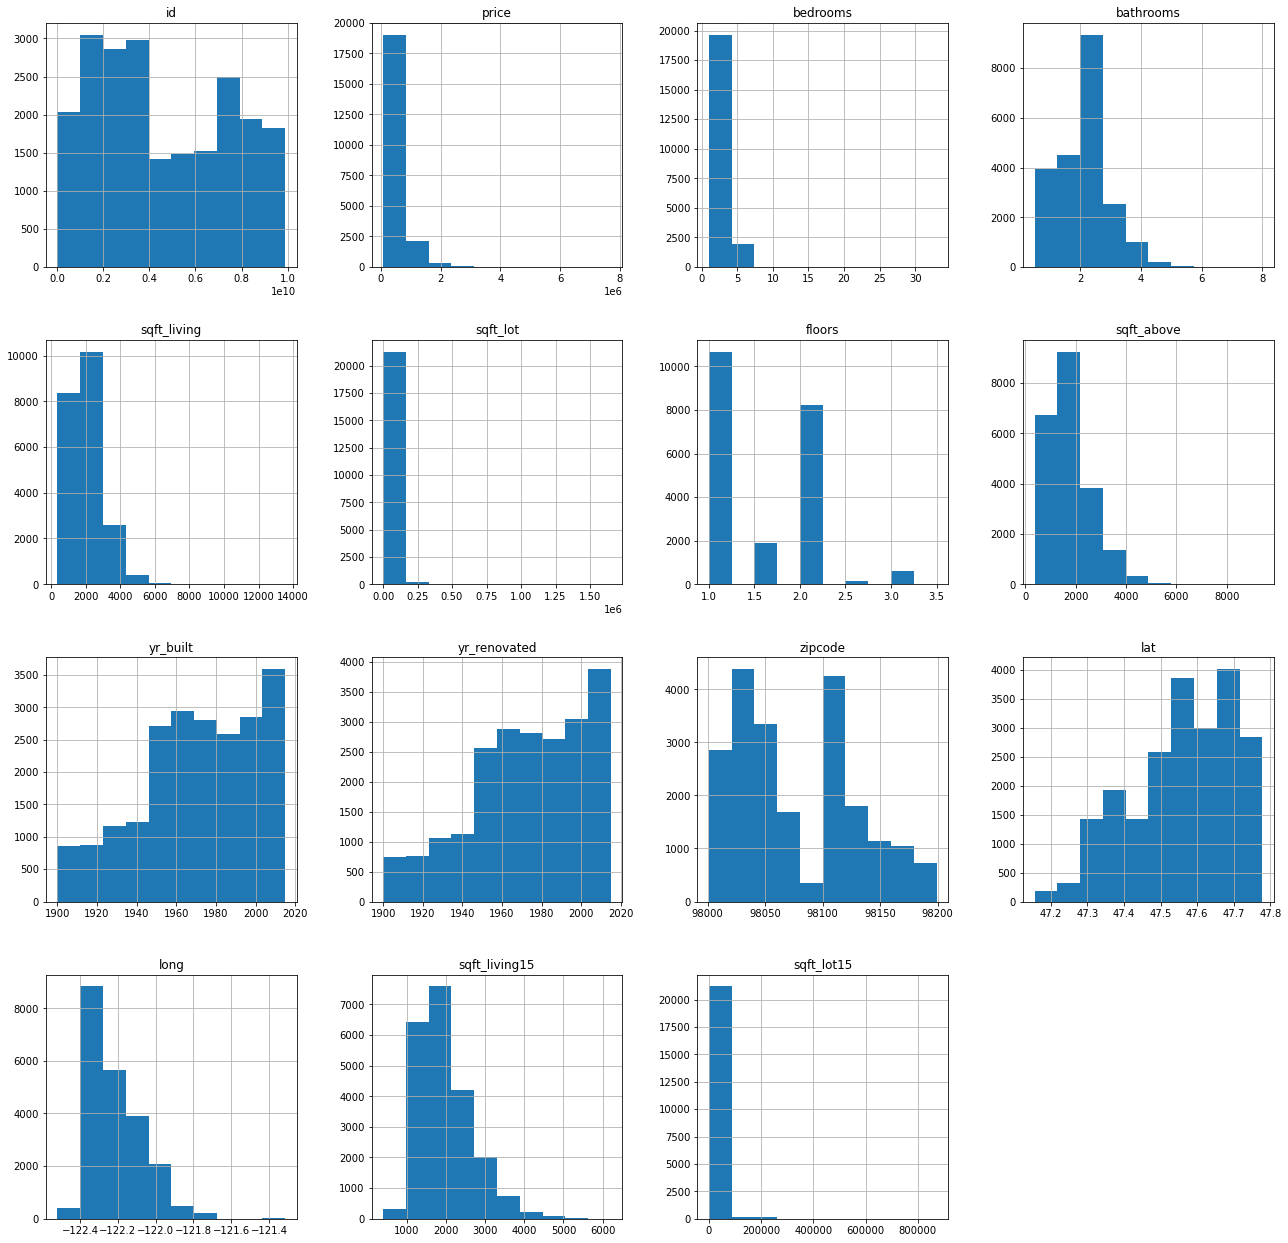

In [29]:
#histogram plotting
kc_df.hist(figsize=(22,22))
plt.show()

## Histogram Analysis
Drop Id column
zipcode - categorical - could change datatype, but this will be added to categorical list.

In [30]:
#df_pairplot = sns.pairplot(kc_df)
#plt.savefig('pairplot_kc_df')
#![pairplot](images/pairplot_kc_df.png)

![pairplot](images/pairplot_kc_df.png)


Pairplots with this many predictors can be hard to deal with.  Going to separate categorical and continous, using type, and run on just continous.  Then get a better look at which predictors should be moved to categorical This is too hard to look at with this many predictors

In [31]:
#kc_df = kc_df.drop(columns=['id'])
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

## Dividing into 2 DataFrames
kc_cont will have all the continous - Dtype (int64,float64)
kc-cat will have all the categorical - Dtype !(int64,float64)

keep in mind that predictors will be moved after this step if shown to be categorical. 

In [32]:
##create kc_cont dataframe with numerical data
kc_cont = kc_df.select_dtypes(include=('float64','int64'))
kc_cont.head()


id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   sqft_above  yr_built  yr_renovated  zipcode      lat     long  \
0        1180      1955          1955    98178  47.5112 -122.257   
1        2170      1951          1991    98125  47.7210 -122.319   
2         770      1933          1933    98028  47.7379 -122.233   
3        1050      1965          1965    98136  47.5208 -122.393   
4        1680      1987          1987    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [33]:
kc_cat = kc_df.select_dtypes(exclude=('float64','int64'))
kc_cat.head()

date waterfront  view  condition          grade sqft_basement  \
0 2014-10-13         NO  NONE    Average      7 Average           0.0   
1 2014-12-09         NO  NONE    Average      7 Average         400.0   
2 2015-02-25         NO  NONE    Average  6 Low Average           0.0   
3 2014-12-09         NO  NONE  Very Good      7 Average         910.0   
4 2015-02-18         NO  NONE    Average         8 Good           0.0   

          district  
0          Seattle  
1          Seattle  
2       Northshore  
3          Seattle  
4  Lake Washington

In [34]:
#pairplot on kc_cont should be easier to read
#kc_cont_pairplot = sns.pairplot(kc_cont)
#plt.savefig('images/pairplot_kc_contdf')
#![pairplot](images/pairplot_kc_contdf.png)

![pairplot](images/pairplot_kc_contdf.png)

This is still hard to read variable names but many of continuous predictors seem to be categorical.  Zipcode, Floors, Bedrooms etc.. Unique Value Counts will be the best indicator.

## Get Unique Value Counts
get the unique value counts for the continuous variables.  low numbers will indicate a need to move into the categorical predictor group.

This is a good time to create column lists and to us .nunique()

In [35]:
#create list of categorical and continuous columns
cat_col =[col for col in kc_cat]
cont_col = [col for col in kc_cont]
print (cat_col, cont_col)


['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'district'] ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [36]:
##Loop through cont_columns and return the column and the unique value using nunique()
for col in cont_col:
    print('Col: {}  --- Unique Values: {}'.format(col, kc_cont[col].nunique()))

Col: id  --- Unique Values: 21420
Col: price  --- Unique Values: 3622
Col: bedrooms  --- Unique Values: 12
Col: bathrooms  --- Unique Values: 29
Col: sqft_living  --- Unique Values: 1034
Col: sqft_lot  --- Unique Values: 9776
Col: floors  --- Unique Values: 6
Col: sqft_above  --- Unique Values: 942
Col: yr_built  --- Unique Values: 116
Col: yr_renovated  --- Unique Values: 116
Col: zipcode  --- Unique Values: 70
Col: lat  --- Unique Values: 5033
Col: long  --- Unique Values: 751
Col: sqft_living15  --- Unique Values: 777
Col: sqft_lot15  --- Unique Values: 8682


**Definitely** move 'Floors'
It would be good to onehotencode 'Floors' into categorical variables

**Potentially** move 'Bedrooms', 'Bathrooms'
Bedrooms and Bathrooms will most likely also be best in categorical variables

**Not At This Time** Zipcode would create 70 new predictors.  While zipcode is important we may leave it alone for now, due to the fact that it was the driver for determining school district.  This will definitely create a collinear issue with the zipcodes and districts

Going to go ahead and move 'Floors', 'Bedrooms', 'Bathrooms' from kc_cont to kc_cat


In [37]:
##add 'Floors', 'Bedrooms', 'Bathrooms' to kc_cat
adding_cols = ['floors', 'bedrooms', 'bathrooms']
#will be easier to add these columns to our list and recreate kc_cat
cols = cat_col + adding_cols
cols

['date',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_basement',
 'district',
 'floors',
 'bedrooms',
 'bathrooms']

In [38]:
## recreate kc_cat
kc_cat = kc_df[cols]
kc_cat.head()

date waterfront  view  condition          grade sqft_basement  \
0 2014-10-13         NO  NONE    Average      7 Average           0.0   
1 2014-12-09         NO  NONE    Average      7 Average         400.0   
2 2015-02-25         NO  NONE    Average  6 Low Average           0.0   
3 2014-12-09         NO  NONE  Very Good      7 Average         910.0   
4 2015-02-18         NO  NONE    Average         8 Good           0.0   

          district  floors  bedrooms  bathrooms  
0          Seattle     1.0         3       1.00  
1          Seattle     2.0         3       2.25  
2       Northshore     1.0         2       1.00  
3          Seattle     1.0         4       3.00  
4  Lake Washington     1.0         3       2.00

In [39]:
##drop 'Floors', 'Bedrooms', 'Bathrooms' from kc_cont
kc_cont = kc_cont.drop(columns=adding_cols)

In [40]:
kc_cont.head()

id     price  sqft_living  sqft_lot  sqft_above  yr_built  \
0  7129300520  221900.0         1180      5650        1180      1955   
1  6414100192  538000.0         2570      7242        2170      1951   
2  5631500400  180000.0          770     10000         770      1933   
3  2487200875  604000.0         1960      5000        1050      1965   
4  1954400510  510000.0         1680      8080        1680      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0          1955    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2          1933    98028  47.7379 -122.233           2720        8062  
3          1965    98136  47.5208 -122.393           1360        5000  
4          1987    98074  47.6168 -122.045           1800        7503

## Feature Engineering - Age - Years Since Renovation

The 'yr_built' column will tell us how old the house is.  Replacing that column with an age column.  We will create a continuous predictor.  

The 'yr_renovated' column can be years since renovation.  

For both of these we will use the year 2016 as the current year as our data ends in May of 2015.


In [41]:
##create new column 'age' 

kc_cont['age'] = kc_cont.apply(lambda x: 2016 - x['yr_built'],axis=1)
kc_cont.head()

id     price  sqft_living  sqft_lot  sqft_above  yr_built  \
0  7129300520  221900.0         1180      5650        1180      1955   
1  6414100192  538000.0         2570      7242        2170      1951   
2  5631500400  180000.0          770     10000         770      1933   
3  2487200875  604000.0         1960      5000        1050      1965   
4  1954400510  510000.0         1680      8080        1680      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   age  
0          1955    98178  47.5112 -122.257           1340        5650  61.0  
1          1991    98125  47.7210 -122.319           1690        7639  65.0  
2          1933    98028  47.7379 -122.233           2720        8062  83.0  
3          1965    98136  47.5208 -122.393           1360        5000  51.0  
4          1987    98074  47.6168 -122.045           1800        7503  29.0

In [42]:
#create new column 'yr_since_reno'
kc_cont['yr_since_reno'] = kc_cont.apply(lambda x: 2016 - x['yr_renovated'],axis=1)
kc_cont.head()


id     price  sqft_living  sqft_lot  sqft_above  yr_built  \
0  7129300520  221900.0         1180      5650        1180      1955   
1  6414100192  538000.0         2570      7242        2170      1951   
2  5631500400  180000.0          770     10000         770      1933   
3  2487200875  604000.0         1960      5000        1050      1965   
4  1954400510  510000.0         1680      8080        1680      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   age  \
0          1955    98178  47.5112 -122.257           1340        5650  61.0   
1          1991    98125  47.7210 -122.319           1690        7639  65.0   
2          1933    98028  47.7379 -122.233           2720        8062  83.0   
3          1965    98136  47.5208 -122.393           1360        5000  51.0   
4          1987    98074  47.6168 -122.045           1800        7503  29.0   

   yr_since_reno  
0           61.0  
1           25.0  
2           83.0  
3           51.0  
4           29.0

In [43]:
#drop yr_built / yr_renovated
kc_cont = kc_cont.drop(columns = ['yr_built','yr_renovated'], axis=1)
kc_cont.head()

id     price  sqft_living  sqft_lot  sqft_above  zipcode      lat  \
0  7129300520  221900.0         1180      5650        1180    98178  47.5112   
1  6414100192  538000.0         2570      7242        2170    98125  47.7210   
2  5631500400  180000.0          770     10000         770    98028  47.7379   
3  2487200875  604000.0         1960      5000        1050    98136  47.5208   
4  1954400510  510000.0         1680      8080        1680    98074  47.6168   

      long  sqft_living15  sqft_lot15   age  yr_since_reno  
0 -122.257           1340        5650  61.0           61.0  
1 -122.319           1690        7639  65.0           25.0  
2 -122.233           2720        8062  83.0           83.0  
3 -122.393           1360        5000  51.0           51.0  
4 -122.045           1800        7503  29.0           29.0

## Scatter Plot Continuous Variables - Price

In [44]:
#make sure we have continous columns list correct
cont_cols = kc_cont.columns.tolist()
#remove first two id, price
del cont_cols[:2]
cont_cols




['sqft_living',
 'sqft_lot',
 'sqft_above',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'age',
 'yr_since_reno']

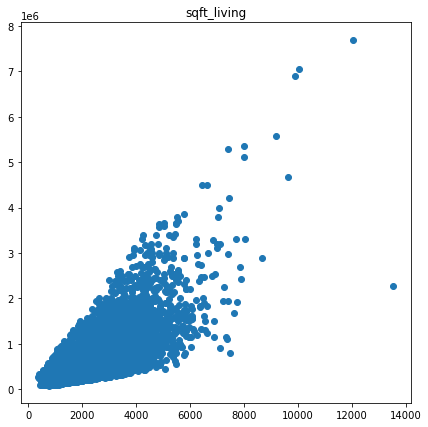

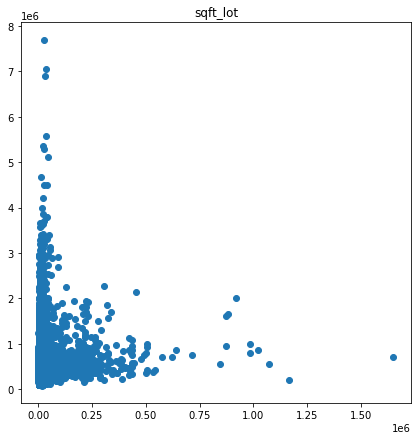

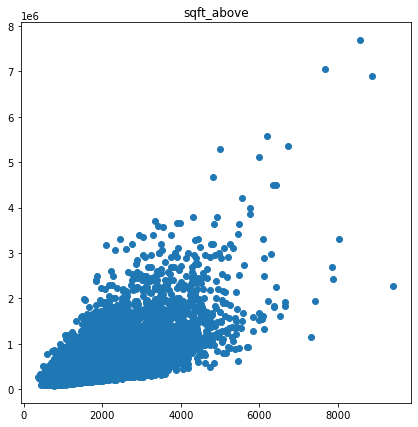

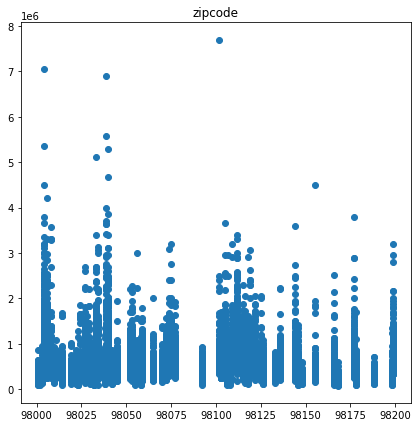

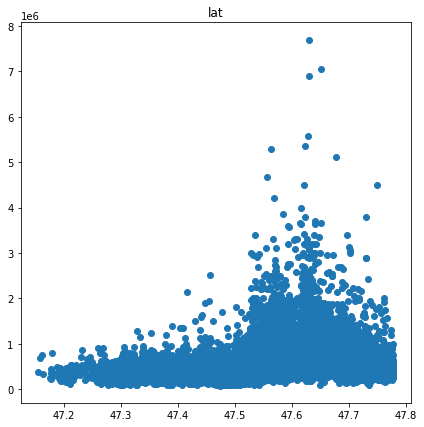

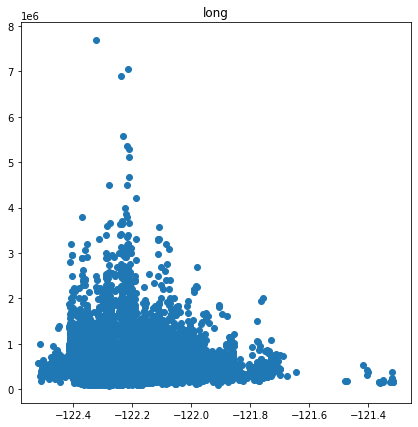

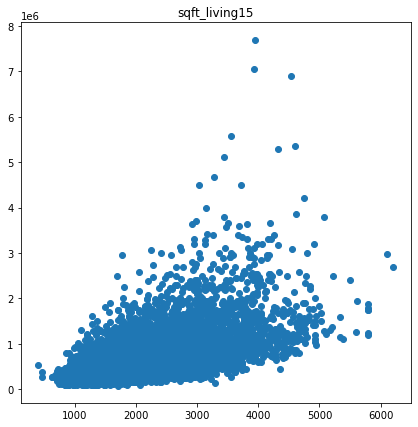

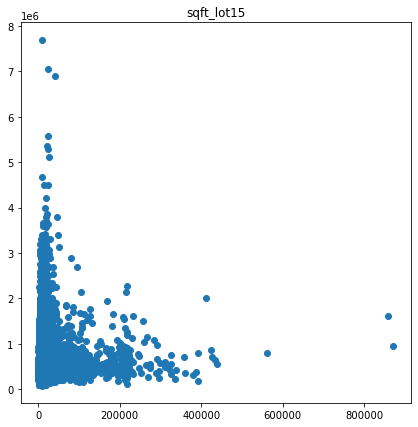

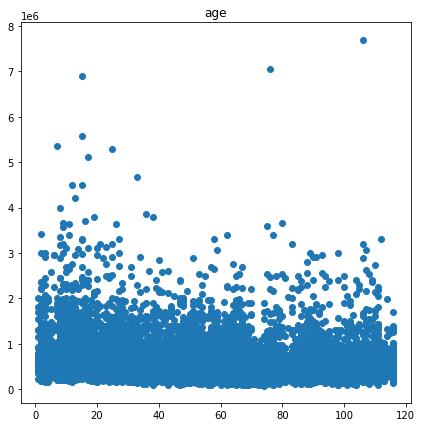

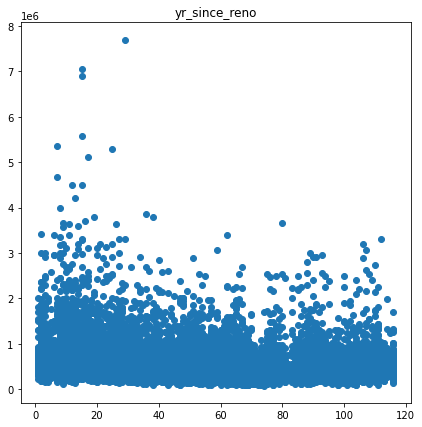

In [45]:
y = kc_cont['price']
#Loop through cont_cols and create scatter plots
for i, col in enumerate(cont_cols):
    fig, ax = plt.subplots(figsize=(7,7))
    x = kc_cont[col]
    plt.scatter(x=x,y=y, data=None)
    plt.title(x.name)


## Scatter Plot Analysis
Looking at the scatter plots we can see that 'sqft_living' will most likely have our strongest relationship.  

Zipcode Lat, and Long can probably be dropped as the location data they provide will be collinear with District.


In [46]:
# dropping zipcode, long, lat
dropping=[ 'zipcode','lat','long']
final_cont = kc_cont.drop(dropping, axis=1)
final_cont.head()

id     price  sqft_living  sqft_lot  sqft_above  sqft_living15  \
0  7129300520  221900.0         1180      5650        1180           1340   
1  6414100192  538000.0         2570      7242        2170           1690   
2  5631500400  180000.0          770     10000         770           2720   
3  2487200875  604000.0         1960      5000        1050           1360   
4  1954400510  510000.0         1680      8080        1680           1800   

   sqft_lot15   age  yr_since_reno  
0        5650  61.0           61.0  
1        7639  65.0           25.0  
2        8062  83.0           83.0  
3        5000  51.0           51.0  
4        7503  29.0           29.0

The Continous Data is now ready for the modeling phase we 

## Handling Categorical Data
Now that we have the continous data set we can move on to the categorical data.  Onehotencoding the categorical variables will be necessary for them to be used in the model.

Below we can revist the kc_cat dataframe.

In [47]:
kc_cat.head()

date waterfront  view  condition          grade sqft_basement  \
0 2014-10-13         NO  NONE    Average      7 Average           0.0   
1 2014-12-09         NO  NONE    Average      7 Average         400.0   
2 2015-02-25         NO  NONE    Average  6 Low Average           0.0   
3 2014-12-09         NO  NONE  Very Good      7 Average         910.0   
4 2015-02-18         NO  NONE    Average         8 Good           0.0   

          district  floors  bedrooms  bathrooms  
0          Seattle     1.0         3       1.00  
1          Seattle     2.0         3       2.25  
2       Northshore     1.0         2       1.00  
3          Seattle     1.0         4       3.00  
4  Lake Washington     1.0         3       2.00

## Choosing Predictors and Creating Dummies
We will ignore date for now.  Potentially breaking the date down at a later time.

sqft_basement should be dropped.  This was missed earlier.

below we will create a new dataframe with the other columns and create our dummies using pd.get_dummies(

In [48]:
## get_dummies creation
get_dummies = kc_cat.drop(['date','sqft_basement'],axis=1)

get_dummies.head()

waterfront  view  condition          grade         district  floors  \
0         NO  NONE    Average      7 Average          Seattle     1.0   
1         NO  NONE    Average      7 Average          Seattle     2.0   
2         NO  NONE    Average  6 Low Average       Northshore     1.0   
3         NO  NONE  Very Good      7 Average          Seattle     1.0   
4         NO  NONE    Average         8 Good  Lake Washington     1.0   

   bedrooms  bathrooms  
0         3       1.00  
1         3       2.25  
2         2       1.00  
3         4       3.00  
4         3       2.00

In [49]:
#display unique values for each category
cols = get_dummies.columns
for col in cols:
    print('Category: {} Vales: {}'.format(col, kc_cat[col].unique()))
    print('/n')

Category: waterfront Vales: ['NO' 'YES']
/n
Category: view Vales: ['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
/n
Category: condition Vales: ['Average' 'Very Good' 'Good' 'Poor' 'Fair']
/n
Category: grade Vales: ['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
/n
Category: district Vales: ['Seattle' 'Northshore' 'Lake Washington' 'Federal Way' 'Highline'
 'Tahoma' 'Bellevue' 'Riverview' 'Auburn' 'Mercer Island' 'Kent'
 'Issaquah' 'Renton' 'Vashon Island' 'Enumclaw' 'Snoqualmie Valley'
 'Shoreline' 'Tukwila' 'Fife']
/n
Category: floors Vales: [1.  2.  1.5 3.  2.5 3.5]
/n
Category: bedrooms Vales: [ 3  2  4  5  1  6  7  8  9 11 10 33]
/n
Category: bathrooms Vales: [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]
/n


In [50]:
get_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   waterfront  21597 non-null  object 
 1   view        21597 non-null  object 
 2   condition   21597 non-null  object 
 3   grade       21597 non-null  object 
 4   district    21597 non-null  object 
 5   floors      21597 non-null  float64
 6   bedrooms    21597 non-null  int64  
 7   bathrooms   21597 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.3+ MB


In [51]:
## change the datatypes of floors and bathrooms 
get_dummies['floors'] = get_dummies['floors'].apply(str)
get_dummies['bedrooms'] = get_dummies['floors'].apply(str)
get_dummies['bathrooms'] = get_dummies['floors'].apply(str)
get_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   waterfront  21597 non-null  object
 1   view        21597 non-null  object
 2   condition   21597 non-null  object
 3   grade       21597 non-null  object
 4   district    21597 non-null  object
 5   floors      21597 non-null  object
 6   bedrooms    21597 non-null  object
 7   bathrooms   21597 non-null  object
dtypes: object(8)
memory usage: 1.3+ MB


## PD.get_dummies
pd.get_dummies will create a new boolean column for each unique response using the drop_first = True will eliminate the ability of a dummy trap.  

A dummy trap is collinearity effect.  
For example if 'waterfront' has two possibilities then the 'Yes' column can be dropped.  It is redundant to have to say that 'a property is on the waterfront and is also not not on the waterfront'.  

In [52]:
##columns to transform
transform = get_dummies.columns.tolist()
transform

['waterfront',
 'view',
 'condition',
 'grade',
 'district',
 'floors',
 'bedrooms',
 'bathrooms']

In [53]:
##new dataframe with dummies
with_dummies = pd.get_dummies(data=get_dummies, columns=transform, drop_first=True)
with_dummies.head()

waterfront_YES  view_EXCELLENT  view_FAIR  view_GOOD  view_NONE  \
0               0               0          0          0          1   
1               0               0          0          0          1   
2               0               0          0          0          1   
3               0               0          0          0          1   
4               0               0          0          0          1   

   condition_Fair  condition_Good  condition_Poor  condition_Very Good  \
0               0               0               0                    0   
1               0               0               0                    0   
2               0               0               0                    0   
3               0               0               0                    1   
4               0               0               0                    0   

   grade_11 Excellent  grade_12 Luxury  grade_13 Mansion  grade_3 Poor  \
0                   0                0                 0             0   
1                   0                0                 0             0   
2                   0                0                 0             0   
3                   0                0                 0             0   
4                   0                0                 0             0   

   grade_4 Low  grade_5 Fair  grade_6 Low Average  grade_7 Average  \
0            0             0                    0                1   
1            0             0                    0                1   
2            0             0                    1                0   
3            0             0                    0                1   
4            0             0                    0                0   

   grade_8 Good  grade_9 Better  district_Bellevue  district_Enumclaw  \
0             0               0                  0                  0   
1             0               0                  0                  0   
2             0               0                  0                  0   
3             0               0                  0                  0   
4             1               0                  0                  0   

   district_Federal Way  district_Fife  district_Highline  district_Issaquah  \
0                     0              0                  0                  0   
1                     0              0                  0                  0   
2                     0              0                  0                  0   
3                     0              0                  0                  0   
4                     0              0                  0                  0   

   district_Kent  district_Lake Washington  district_Mercer Island  \
0              0                         0                       0   
1              0                         0                       0   
2              0                         0                       0   
3              0                         0                       0   
4              0                         1                       0   

   district_Northshore  district_Renton  district_Riverview  district_Seattle  \
0                    0                0                   0                 1   
1                    0                0                   0                 1   
2                    1                0                   0                 0   
3                    0                0                   0                 1   
4                    0                0                   0                 0   

   district_Shoreline  district_Snoqualmie Valley  district_Tahoma  \
0                   0                           0                0   
1                   0                           0                0   
2                   0                           0                0   
3                   0                           0                0   
4                   0                           0                0   

   district_Tukwila  d

## Evaluate Our Separated Datasets
They seem to be split according to our specifications.  We can now combine them and begin constructing our Baseline Model.

## Combine Dataframes
with_dummies has the dummies columns
final_cont has the categorical data


In [54]:
#new dataframe will join both
df = final_cont.join(with_dummies)
df.head()

id     price  sqft_living  sqft_lot  sqft_above  sqft_living15  \
0  7129300520  221900.0         1180      5650        1180           1340   
1  6414100192  538000.0         2570      7242        2170           1690   
2  5631500400  180000.0          770     10000         770           2720   
3  2487200875  604000.0         1960      5000        1050           1360   
4  1954400510  510000.0         1680      8080        1680           1800   

   sqft_lot15   age  yr_since_reno  waterfront_YES  view_EXCELLENT  view_FAIR  \
0        5650  61.0           61.0               0               0          0   
1        7639  65.0           25.0               0               0          0   
2        8062  83.0           83.0               0               0          0   
3        5000  51.0           51.0               0               0          0   
4        7503  29.0           29.0               0               0          0   

   view_GOOD  view_NONE  condition_Fair  condition_Good  condition_Poor  \
0          0          1               0               0               0   
1          0          1               0               0               0   
2          0          1               0               0               0   
3          0          1               0               0               0   
4          0          1               0               0               0   

   condition_Very Good  grade_11 Excellent  grade_12 Luxury  grade_13 Mansion  \
0                    0                   0                0                 0   
1                    0                   0                0                 0   
2                    0                   0                0                 0   
3                    1                   0                0                 0   
4                    0                   0                0                 0   

   grade_3 Poor  grade_4 Low  grade_5 Fair  grade_6 Low Average  \
0             0            0             0                    0   
1             0            0             0                    0   
2             0            0             0                    1   
3             0            0             0                    0   
4             0            0             0                    0   

   grade_7 Average  grade_8 Good  grade_9 Better  district_Bellevue  \
0                1             0               0                  0   
1                1             0               0                  0   
2                0             0               0                  0   
3                1             0               0                  0   
4                0             1               0                  0   

   district_Enumclaw  district_Federal Way  district_Fife  district_Highline  \
0                  0                     0              0                  0   
1                  0                     0              0                  0   
2                  0                     0              0                  0   
3                  0                     0              0                  0   
4                  0                     0              0                  0   

   district_Issaquah  district_Kent  district_Lake Washington  \
0                  0              0                         0   
1                  0              0                         0   
2                  0              0                         0   
3                  0              0                         0   
4                  0              0                         1   

   district_Mercer Island  district_Northshore  district_Renton  \
0                       0                    0                0   
1                       0                    0                0   
2                       0                    1                0   
3                       0                    0                0   
4                       0                    0                0   

   district_Riverv

In [55]:
##check to see that we still have the same number of houses
rows, cols = df.shape
original_rows, original_cols = kc_df.shape
print('The original table had {} houses, the new table has {} houses'.format(original_rows, rows))

The original table had 21597 houses, the new table has 21597 houses


## Data Visualizations 
Now that we have all of our data we can look at some visualizations  



array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'yr_since_reno'}>,
        <AxesSubplot:title={'center':'waterfront_YES'}>,
        <AxesSubplot:title={'center':'view_EXCELLENT'}>,
        <AxesSubplot:title={'center':'view_FAIR'}>,
        <AxesSubplot:title={'center':'view_GOOD'}>,
        <AxesSubplot:title={'center':'view_NONE'}>,
        <AxesSubplot:title={'center':'condition_Fair'}>,
        <AxesSubplot:title={'center':'condition_Good'}>],
       [<AxesSubplot:title={'center':'condition_Poor'}>,
        <AxesSubplot:title={'center':'condition_Very Good'}>,
        <AxesSubplot:title={'cent

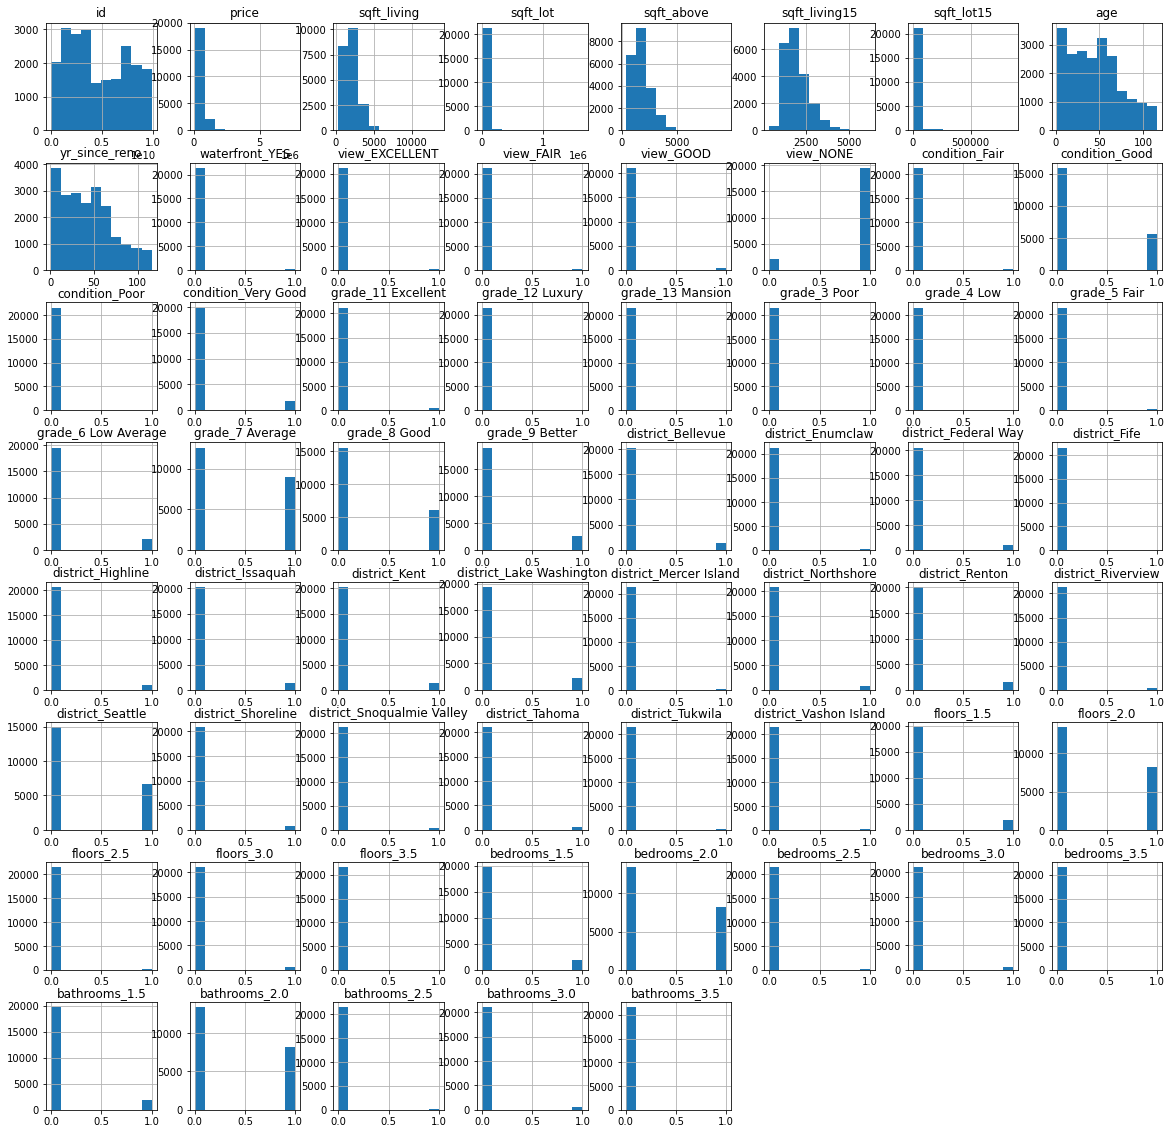

In [56]:
## histograms
df.hist(figsize=(20,20))

## School District
Below we have an overlay of School District an Zip Codes to give a general idea of the areas of each School Disrict in the county.  Remember we have accounted for zipcode in our district dummy variables.

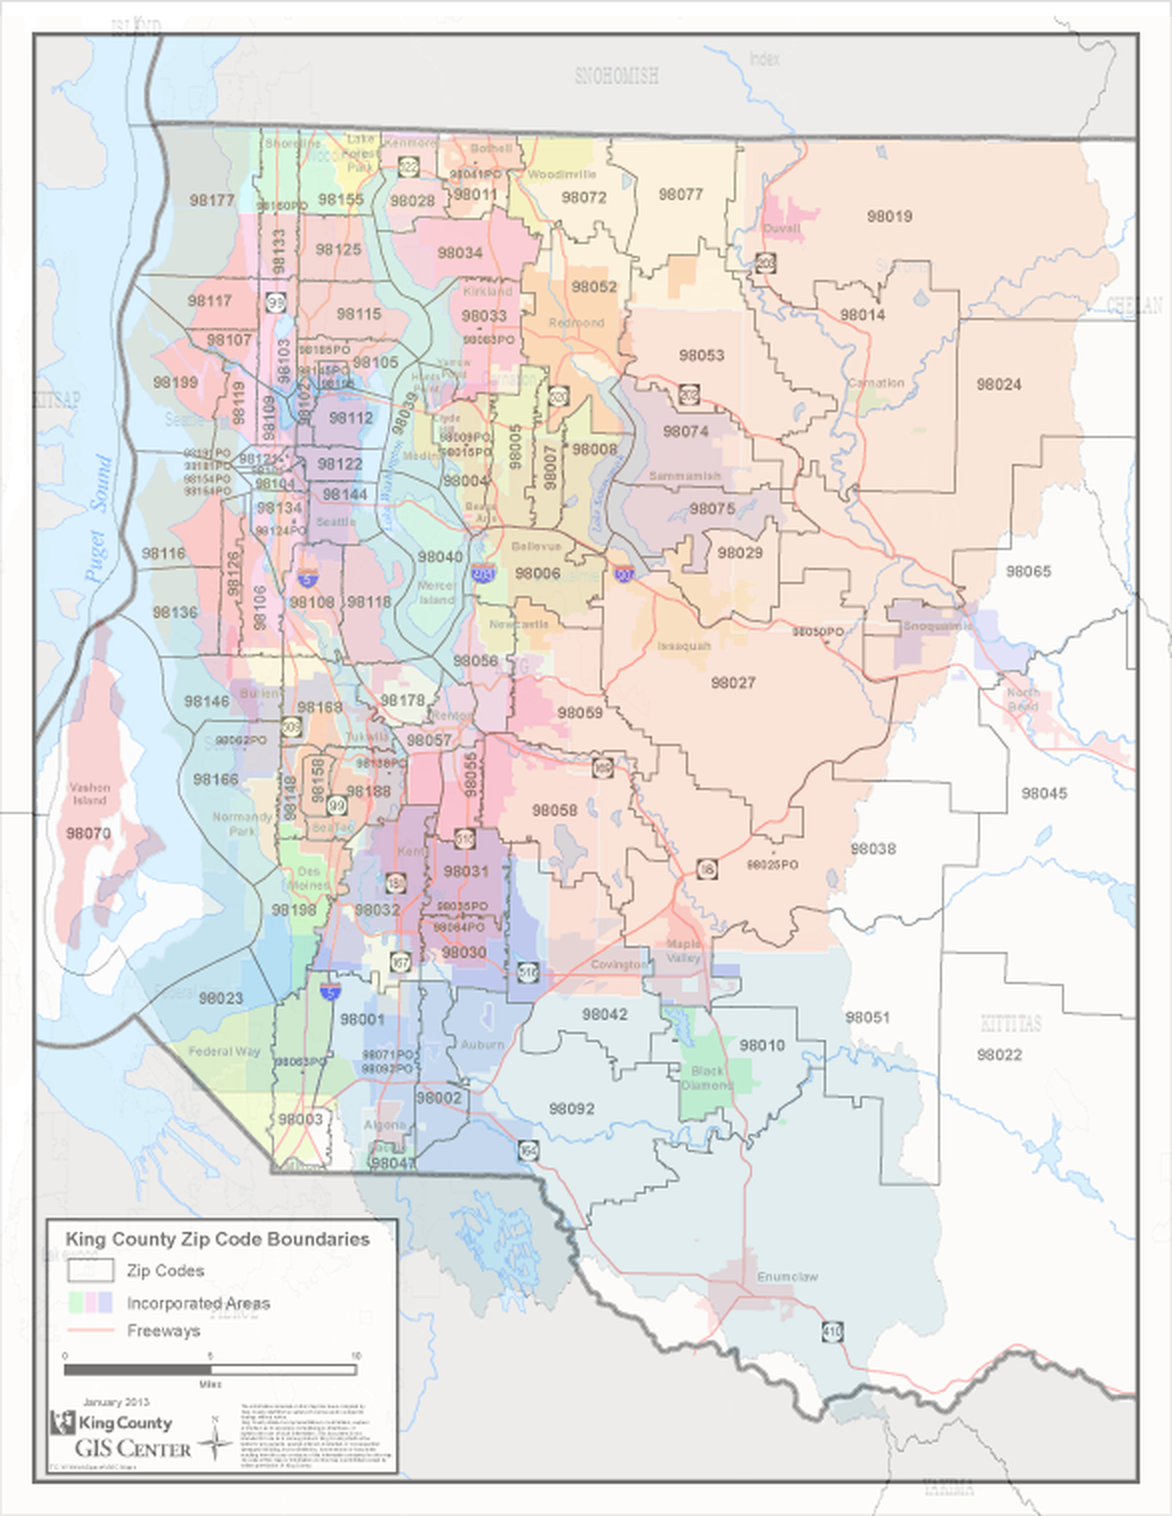

In [57]:
#import images from Pillow
from PIL import Image

#make the zipcode code image the background image
imbg = Image.open("images/zipcodesgif.gif").convert("RGBA")
#make the school district map the foreground image
imfg = Image.open("images/SCHDST.JPG").convert("RGBA")
#change the alpha of the overlayed foreground image. 
imfg.putalpha(80)
#get the width and height from the background image
imbg_width, imbg_height = imbg.size
#resize the foregraound image to match the background image
imfg_resized = imfg.resize((imbg_width, imbg_height), Image.LANCZOS)
imbg.paste(imfg_resized, (0,8), imfg_resized)
imbg = imbg.resize((imbg_width*2,imbg_height*2), Image.LANCZOS)
imbg

## Plot the houses with lat and long to see where they fall on the map

Text(0.5, 1.0, 'King County Prices by Location')

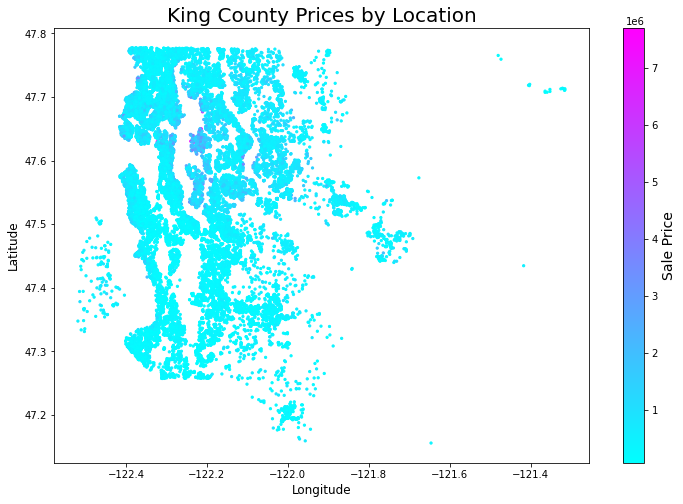

In [58]:
##
plt.figure(figsize=(12,8))
plt.scatter(kc_df.long, kc_df.lat ,c=kc_df.price, cmap = 'cool', s=5)
plt.colorbar().set_label('Sale Price', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('King County Prices by Location', fontsize=20)

#plt.show()

In [59]:
kc_df.groupby(['district'])['price'].describe()

count          mean            std       min       25%  \
district                                                                     
Auburn              659.0  2.962630e+05  109923.828127   90000.0  225000.0   
Bellevue           1320.0  9.428449e+05  643028.316698  247500.0  555000.0   
Enumclaw            297.0  3.412966e+05  147082.403462  122000.0  240000.0   
Federal Way        1093.0  2.868605e+05  107282.081110   85000.0  225000.0   
Fife                 37.0  3.041791e+05  138982.439140  139000.0  210000.0   
Highline           1097.0  3.403474e+05  207729.820251   78000.0  228900.0   
Issaquah           1448.0  6.563895e+05  302958.638106  130000.0  475000.0   
Kent               1410.0  3.110395e+05  106384.067421   85000.0  249000.0   
Lake Washington    2315.0  6.587561e+05  330492.082252   90000.0  460000.0   
Mercer Island       282.0  1.194874e+06  607767.641893  500000.0  822000.0   
Northshore          897.0  5.411156e+05  214605.152186  160000.0  401000.0   
Renton             1611.0  4.260111e+05  228572.283889   90000.0  290000.0   
Riverview           358.0  4.840617e+05  227896.727809   80000.0  335000.0   
Seattle            6716.0  5.881722e+05  350156.390653   89950.0  387500.0   
Shoreline           804.0  4.627447e+05  309899.538232  153000.0  327875.0   
Snoqualmie Valley   366.0  5.023386e+05  272001.533827  156000.0  322250.0   
Tahoma              634.0  3.666037e+05  133817.580940   99000.0  284000.0   
Tukwila             136.0  2.775758e+05  117166.794891   81000.0  219712.5   
Vashon Island       117.0  4.893820e+05  201500.750040  160000.0  350000.0   

                        50%        75%        max  
district                                           
Auburn             275000.0   335303.0   930000.0  
Bellevue           753000.0  1042500.0  7060000.0  
Enumclaw           295000.0   398000.0   858000.0  
Federal Way        265000.0   320000.0  1280000.0  
Fife               280000.0   312891.0   850000.0  
Highline           285000.0   381000.0  2510000.0  
Issaquah           601000.0   765000.0  3300000.0  
Kent               293500.0   352562.5  1500000.0  
Lake Washington    585000.0   763500.0  5110000.0  
Mercer Island      993750.0  1387500.0  5300000.0  
Northshore         489900.0   615000.0  1920000.0  
Renton             374950.0   506675.0  3000000.0  
Riverview          435000.0   561500.0  1680000.0  
Seattle            507000.0   679992.5  7700000.0  
Shoreline          400000.0   499000.0  4500000.0  
Snoqualmie Valley  440000.0   588000.0  1950000.0  
Tahoma             340000.0   415000.0  1350000.0  
Tukwila            261295.0   314000.0  1100000.0  
Vashon Island      465000.0   575000.0  1380000.0

In [60]:
#use the above data to create a new dataframe with aggregate data for price
sd_grouped = kc_df.groupby('district').agg({'price': ['mean', 'min', 'max']})
sd_grouped.sort_values(by=[('price','mean')],ascending=False)

price                     
                           mean       min        max
district                                            
Mercer Island      1.194874e+06  500000.0  5300000.0
Bellevue           9.428449e+05  247500.0  7060000.0
Lake Washington    6.587561e+05   90000.0  5110000.0
Issaquah           6.563895e+05  130000.0  3300000.0
Seattle            5.881722e+05   89950.0  7700000.0
Northshore         5.411156e+05  160000.0  1920000.0
Snoqualmie Valley  5.023386e+05  156000.0  1950000.0
Vashon Island      4.893820e+05  160000.0  1380000.0
Riverview          4.840617e+05   80000.0  1680000.0
Shoreline          4.627447e+05  153000.0  4500000.0
Renton             4.260111e+05   90000.0  3000000.0
Tahoma             3.666037e+05   99000.0  1350000.0
Enumclaw           3.412966e+05  122000.0   858000.0
Highline           3.403474e+05   78000.0  2510000.0
Kent               3.110395e+05   85000.0  1500000.0
Fife               3.041791e+05  139000.0   850000.0
Auburn             2.962630e+05   90000.0   930000.0
Federal Way        2.868605e+05   85000.0  1280000.0
Tukwila            2.775758e+05   81000.0  1100000.0

There data above does show that there is some relationship between district and price.  Let's create a boxplot to visualize the diffences

<function matplotlib.pyplot.show(close=None, block=None)>

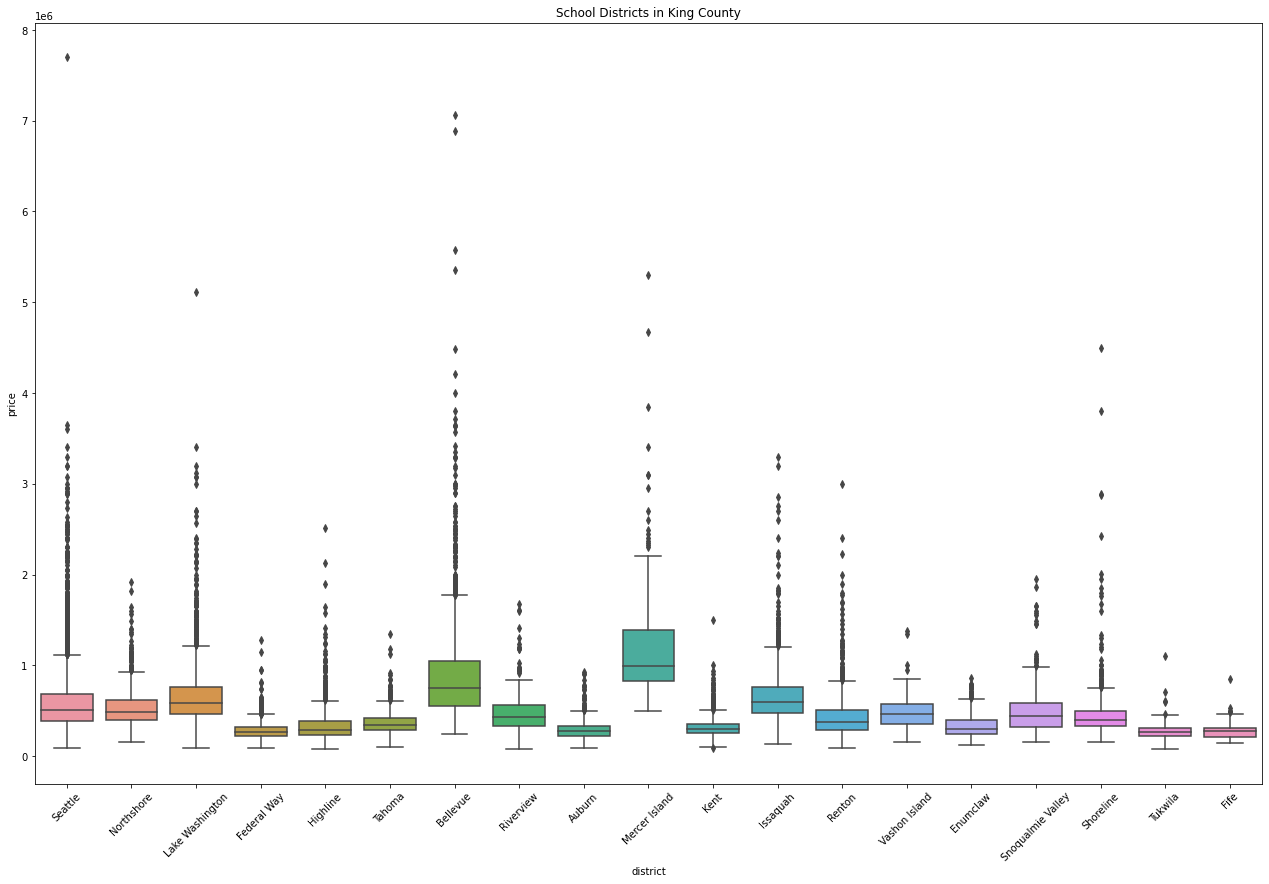

In [61]:
#Boxplots for each school disrict
fig, ax = plt.subplots(figsize=(22,14))
ax = sns.boxplot(x='district', y='price', data=kc_df,)
ax.set_title('School Districts in King County')
plt.xticks(rotation=45)
plt.show

We can see that Mercer Island, Bellevue and Lake Washington have the highest sale price and Auburn, Federal Way, Tukwila have the lowest sale price.  This information can be used by the client to help narrow down which areas they should focus on.

We also can see that we have some outliers.  We can look further into the outliers below

## Outliers
let see what percentage of houses are above 1 million, 1.5 million and 2 million


In [62]:

# total number of houses in the list
total_houses = len(kc_df)
#prices divided by 1 million
prices_div_mil = kc_df.price/ 10**6
## find percent over thresholds 
over_1_mil = (len([num for num in prices_div_mil if num > 1]) / total_houses) *100
over_1pt5_mil = (len([num for num in prices_div_mil if num > 1.5]) / total_houses) *100
over_2_mil = (len([num for num in prices_div_mil if num > 2]) / total_houses) * 100
print('Over 1 Mil: ' ,round(over_1_mil,2), '% Over 1.5 Mil: ', round(over_1pt5_mil,2), '% Over 2 Mil: ',round(over_2_mil,2),'%')

Over 1 Mil:  6.75 % Over 1.5 Mil:  2.39 % Over 2 Mil:  0.92 %


It looks like less than 1% of the homes are over 2 million.  Lets look at the district breakdown without those homes included
## Price Outliers Removed
removing all homes over 2 million dollars from kc_df 
then regroup and box plot the data again.  

In [63]:
kc_df_no_outliers = kc_df[kc_df.price < 2*10**6]
kc_df_no_outliers.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  condition          grade  sqft_above  \
0      5650     1.0         NO  NONE    Average      7 Average        1180   
1      7242     2.0         NO  NONE    Average      7 Average        2170   
2     10000     1.0         NO  NONE    Average  6 Low Average         770   
3      5000     1.0         NO  NONE  Very Good      7 Average        1050   
4      8080     1.0         NO  NONE    Average         8 Good        1680   

  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           0.0      1955          1955    98178  47.5112 -122.257   
1         400.0      1951          1991    98125  47.7210 -122.319   
2           0.0      1933          1933    98028  47.7379 -122.233   
3         910.0      1965          1965    98136  47.5208 -122.393   
4           0.0      1987          1987    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15         district  
0           1340        5650          Seattle  
1           1690        7639          Seattle  
2           2720        8062       Northshore  
3           1360        5000          Seattle  
4           1800        7503  Lake Washington

In [64]:
##check the shape should be smaller now...
kc_df_no_outliers.shape

(21389, 22)

Now let's look at the box plot without houses over 2 million dollars


<function matplotlib.pyplot.show(close=None, block=None)>

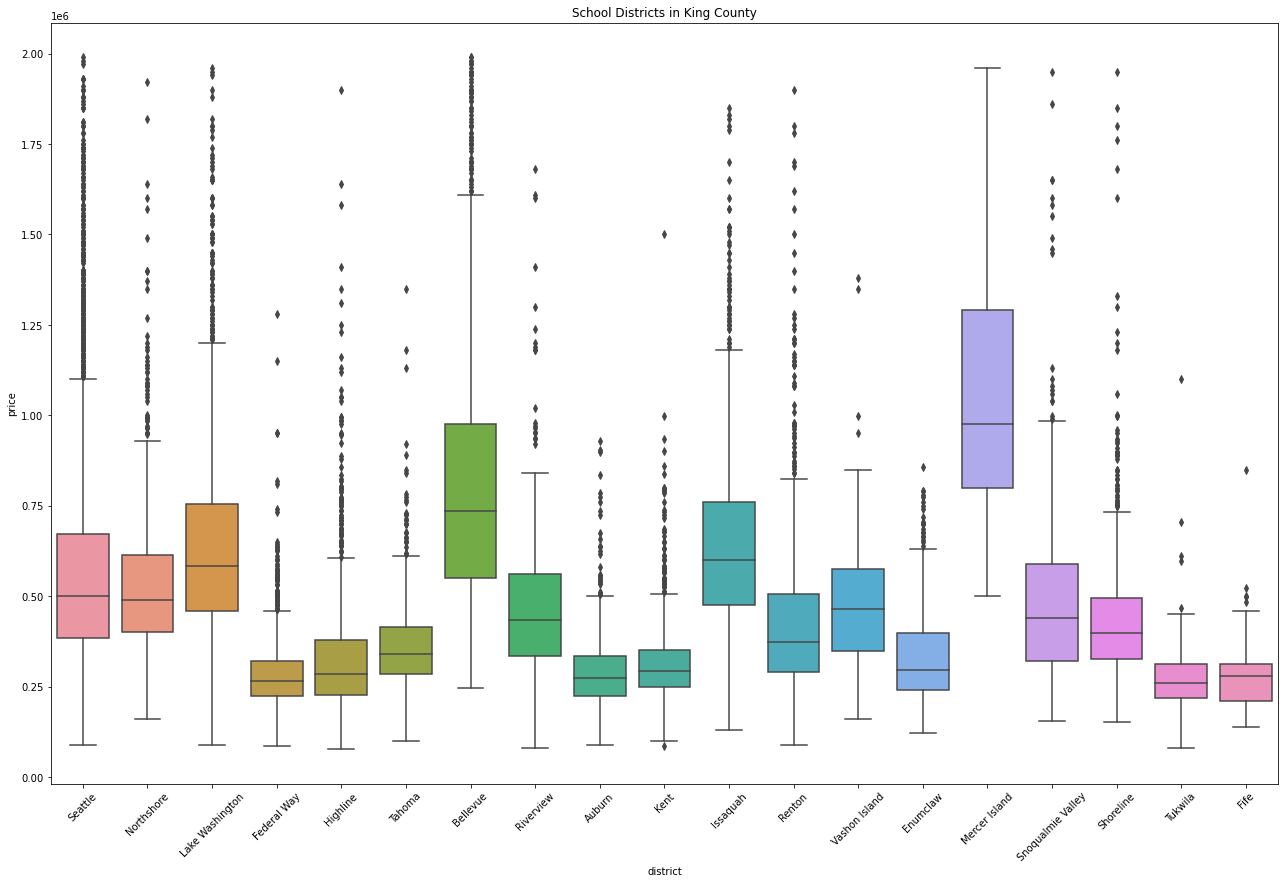

In [65]:
#Boxplots for each school disrict
fig, ax = plt.subplots(figsize=(22,14))
ax = sns.boxplot(x='district', y='price', data=kc_df_no_outliers,)
ax.set_title('School Districts in King County')
plt.xticks(rotation=45)
plt.show

Removing those outliers makes the differences in districts more evident.  Those house can be removed from the data.


## Removing Outliers From the combined data frame
our combined dataframe is called df.  
below we will remove all the outliers before we move on.

In [66]:
##remove outliers from df
df = df[df.price < 2*10**6]
df.shape

(21389, 61)

## Client Questions Update
____

1. What are the leading factors in predicting the sale price of a home?

We are prepared to run linear regression models on our data.  We will then use coefficients to determine which predictors have the greatest impact.  Based on initial visualizations sqft_living seems to be a good prediction.

2. How does school district affect the sale price of the home?

Once we have the leading factors we can see where school district ranks amoung them.

3. What school districts should be targeted during the next election?

Then we will be able to recommend which school districts would make good potential targets in the upcoming election.

## Linear Regression Assumptions

* check for Linearity
* check for Multicollinearity
* check for Homoscedasticity


## Linearity 
Check linearity with jointplots.
We should see linear relationships between predictors and price


## Multicollinearity
use .corr() in a heatmap

<AxesSubplot:>

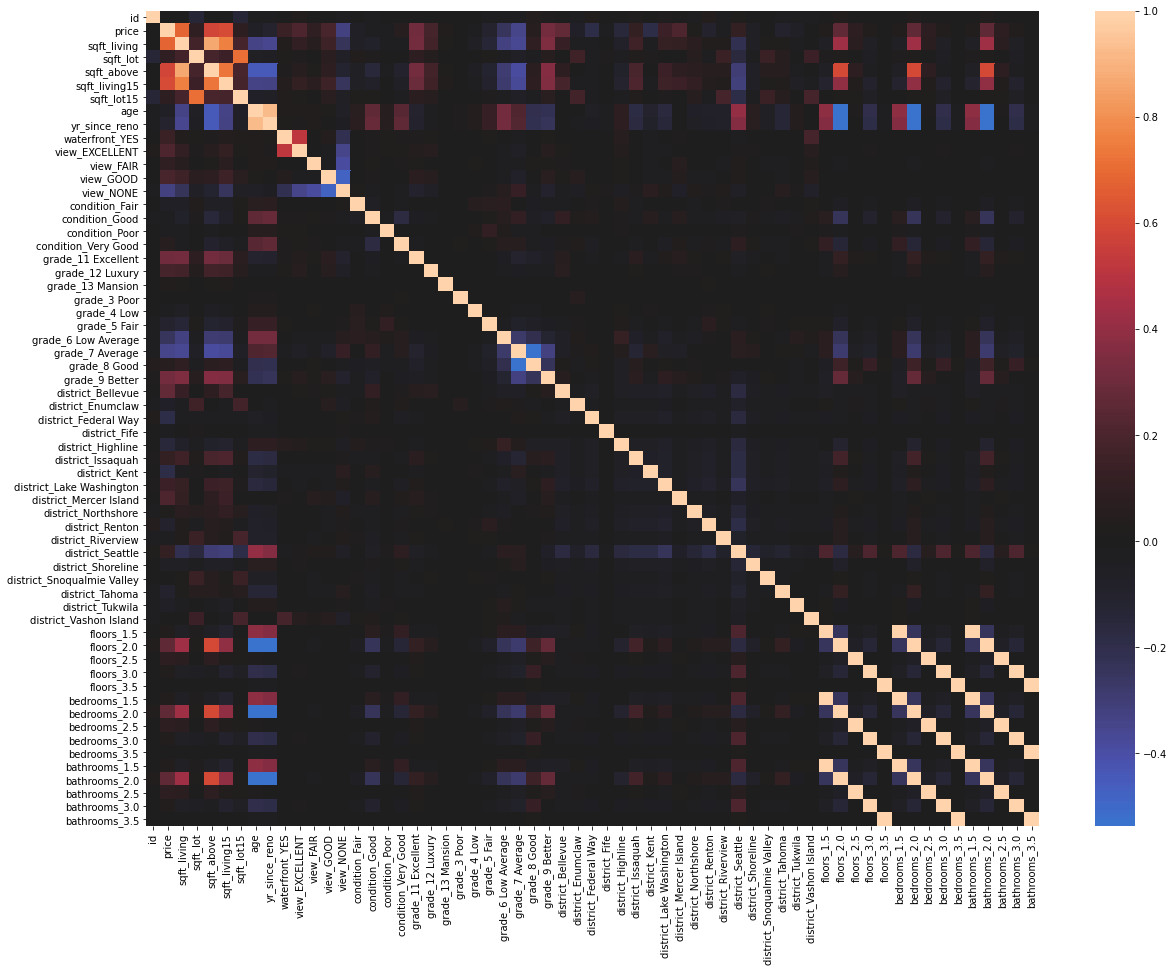

In [67]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), center=0)

We have some multicollinearity as expected with all predictors dealing with sqft -
We also see some between age of home and yr since renovation as expected.

some of these will be eliminated during iterative modeling process

## Homoscedasticity
check this after running model.

# Model
___

Baseline Model built with Sci_Kit Learn
separate into X(predictors) and y(price)

Import:

**from** sklearn.model_selection **import** train_test_split
**from** sklearn.linear_model **import** LinearRegresion
Then
create Train Test Split

In [68]:
#Import from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [69]:
# X and y set up
X = df.drop(['price','id'],axis=1) #dataframe without price, id
y = df[['price']] # dataframe only price


## Train/Test
Train test split using 80/20

In [70]:
#Perform Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
#check lengths to verify split
print('Value should be close to 4 (80/20): ',len(X_train) / len(X_test))




Value should be close to 4 (80/20):  3.9997662459093033


In [71]:
y_train

price
4829   550000.0
5808   569500.0
10183  471000.0
12297  270000.0
942    971000.0
...         ...
11384  299880.0
12071  355000.0
5447   299950.0
872    795000.0
15941  850000.0

[17111 rows x 1 columns]

## Visualize Distribution of Target Variable
price

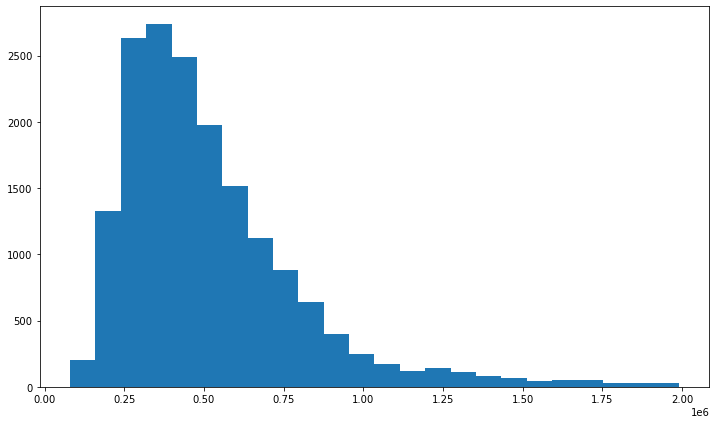

In [72]:
fig, ax = plt.subplots(figsize=(12,7))

ax.hist(y_train['price'], bins=24)
#ax.set_xlabel("Sale Price (USD)")
#ax.set_ylabel("Number of Houses")
#ax.set_title("King County Home Sales - 5/2014 - 5/2015");
plt.show()

## Correlation Table with Predictors and Price
creating another heatmap to show relationship of predictors to price in our Train data.

Text(0.5, 1.0, 'Correalation Heat Map - Between Predictors and Price')

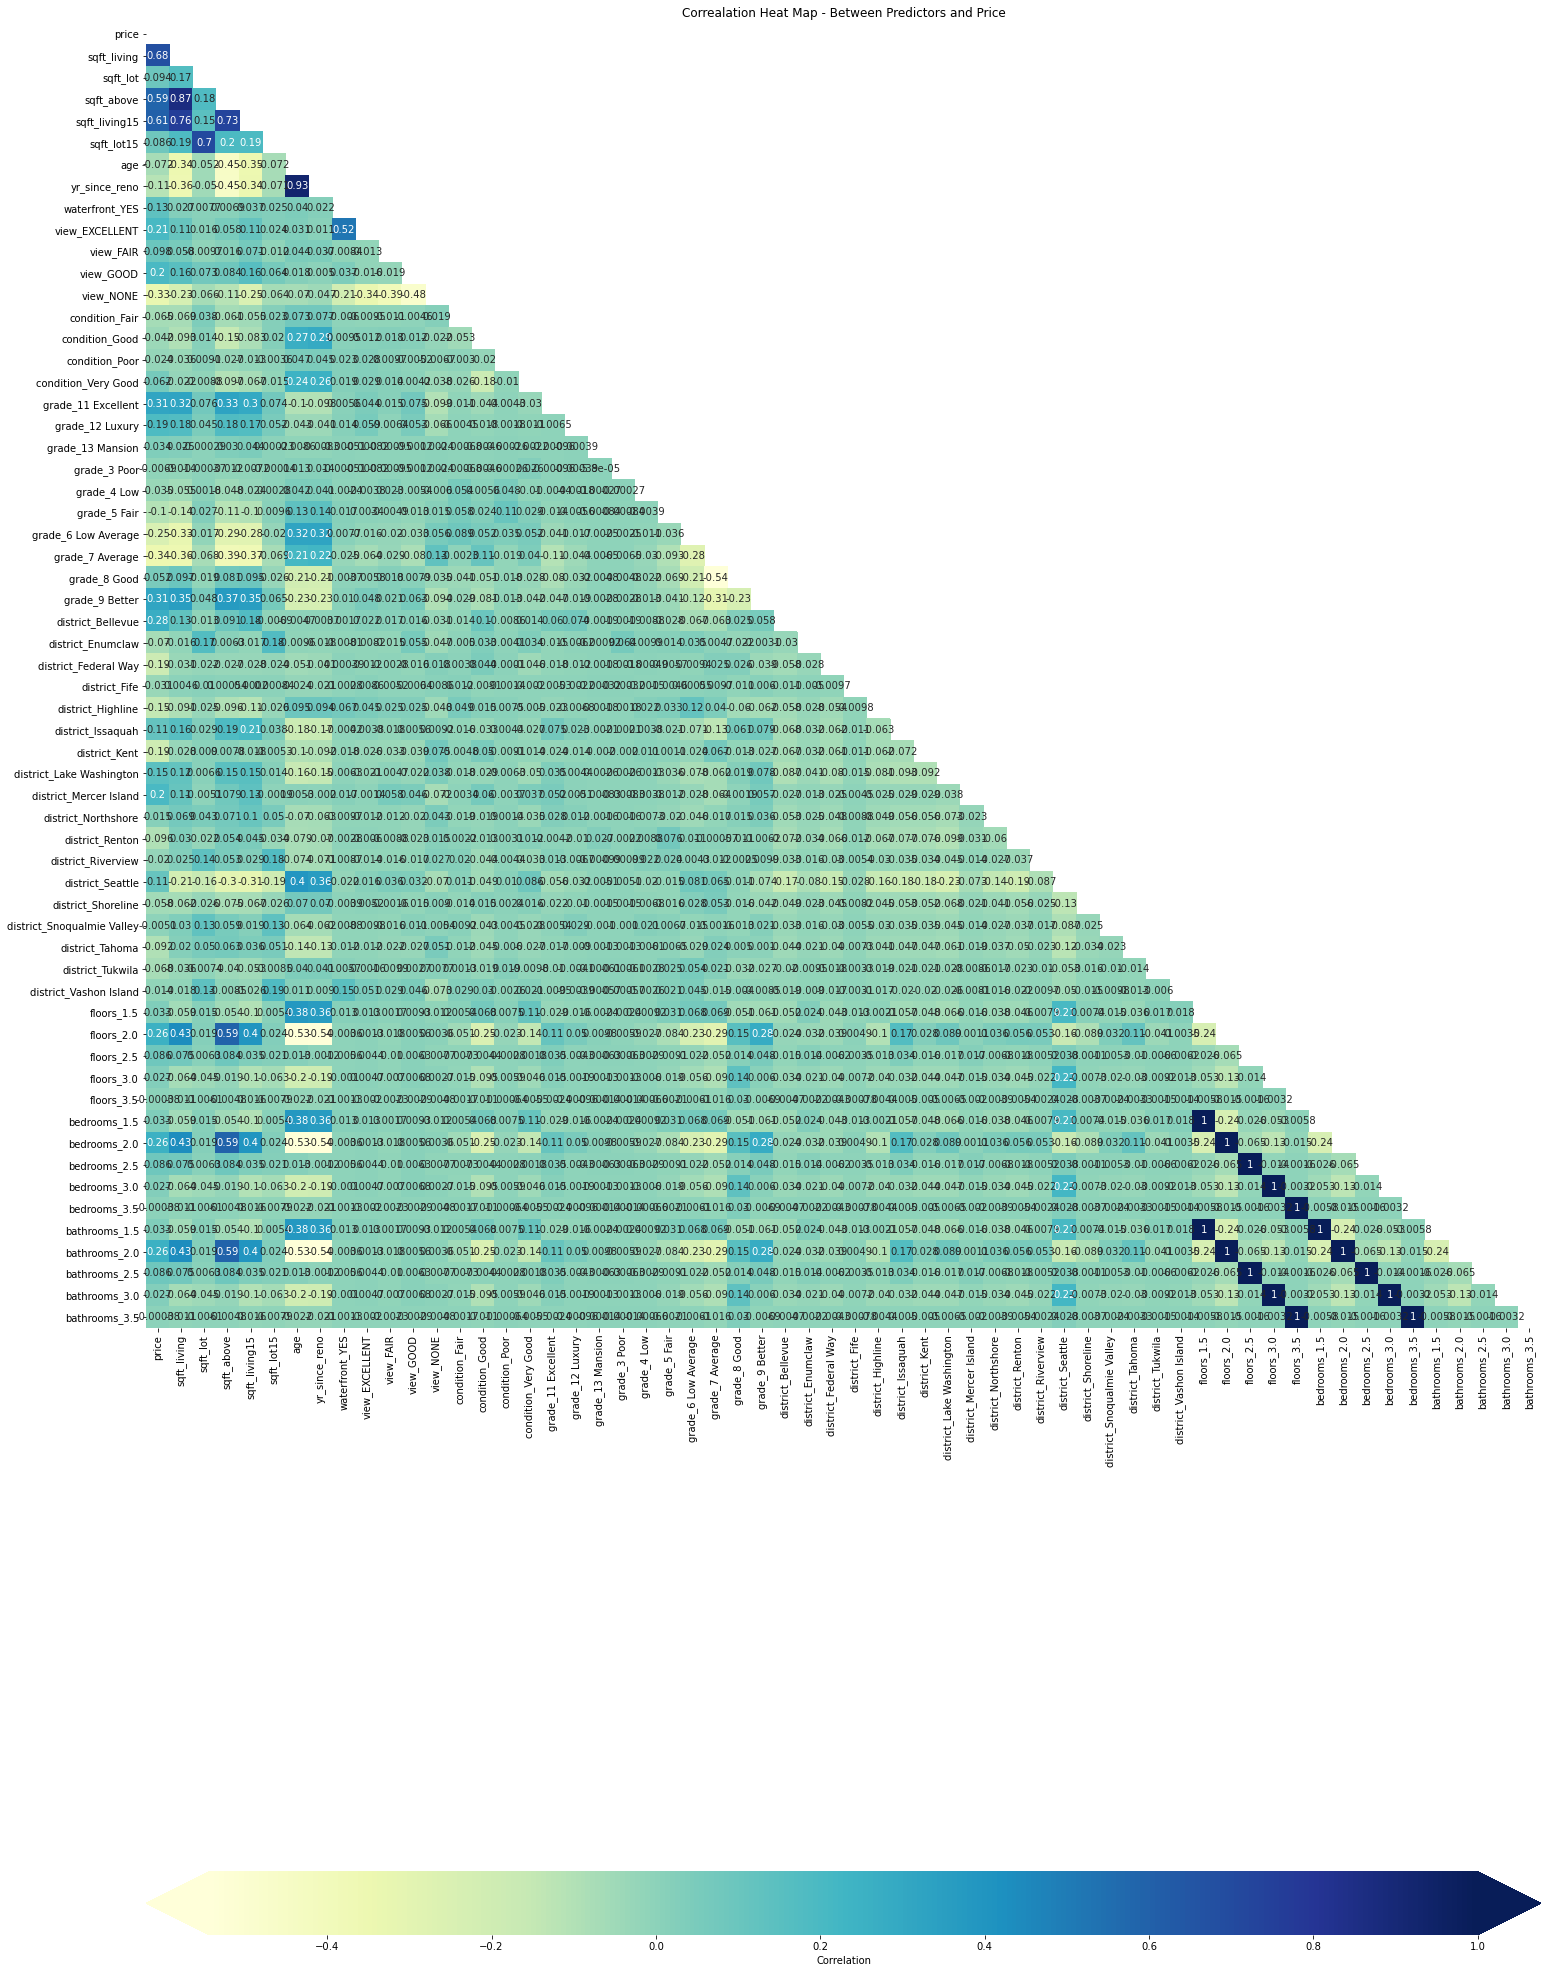

In [73]:
##heatmap
# y_Train needs to be first column in dataframe
hm_data = pd.concat([y_train, X_train], axis=1)
correlation = hm_data.corr()

fig, ax = plt.subplots(figsize=(25, 40))
sns.heatmap(correlation, cmap='YlGnBu',mask=np.triu(np.ones_like(correlation, dtype=bool)), ax=ax, annot=True,
           cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .25, "extend": "both"})
ax.set_title('Correalation Heat Map - Between Predictors and Price')

## Plot Most Correlated Feature


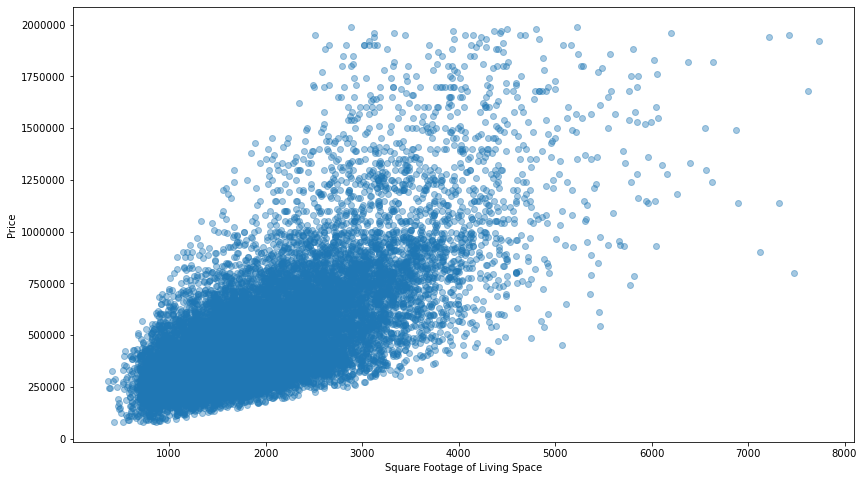

In [74]:
most_corr = 'sqft_living'
#scatter plot
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(X_train[most_corr], y_train, alpha=0.4)
ax.ticklabel_format(style='plain')
ax.set_ylabel('Price')
ax.set_xlabel('Square Footage of Living Space')
plt.show()

## Cross validate and Shuffle Split
This will run three splits 

In [75]:
#cross validate and shuffle split  get Train and test scores for 3 separate splits
from sklearn.model_selection import cross_validate, ShuffleSplit

bl_model = LinearRegression()
#set up the split 80/20
split = ShuffleSplit(n_splits=3, test_size=0.2, random_state=22)

baseline = cross_validate(
            estimator=bl_model,
            X=X_train[[most_corr]],
            y=y_train,
            return_train_score=True,
            cv=split
)
train = baseline['train_score'].mean()
test = baseline['test_score'].mean()
print('Baseline Train: {} \t Baseline Test: {}'.format(train,test))

Baseline Train: 0.46585754751237857 	 Baseline Test: 0.4544112474713442


Using only our most correlated feature of sqft_living we can account for roughly 46% of the price.
Can this count as a baseline model?

## Linear Regression
Running our first linear Regression Model.

We still have not addressed predictors that are corellated, we will do that during this phase.

### Model 1
We will use statsmodel Ordinary Least Squares (OLS)for our linear regressions.

In [76]:
#Importing
import statsmodels.api as sm

In [77]:
#list of predictor columns
X_int = sm.add_constant(X)  #add a constant
model = sm.OLS(y,X_int).fit()  # fit the model
model.summary()  # displat summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     1443.
Date:                Tue, 19 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:46:38   Log-Likelihood:            -2.8347e+05
No. Observations:               21389   AIC:                         5.670e+05
Df Residuals:                   21339   BIC:                         5.674e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.384e+05   1.17e+04     20.438      0.000    2.16e+05    2.61e+05
sqft_living                   94.8842      2.634     36.023      0.000      89.721     100.047
sqft_lot                       0.2445      0.033      7.344      0.000       0.179       0.310
sqft_above                    22.2000      3.208      6.919      0.000      15.911      28.489
sqft_living15                 40.3205      2.499     16.132      0.000      35.421      45.220
sqft_lot15                    -0.1553      0.051     -3.025      0.002      -0.256      -0.055
age                         2004.9993     91.407     21.935      0.000    1825.834    2184.165
yr_since_reno               -965.6995     91.376    -10.568      0.000   -1144.804    -786.595
waterfront_YES              2.951e+05   1.64e+04     17.957      0.000    2.63e+05    3.27e+05
view_EXCELLENT               1.44e+05   1.12e+04     12.819      0.000    1.22e+05    1.66e+05
view_FAIR                   1.853e+04   9007.388      2.057      0.040     872.274    3.62e+04
view_GOOD                   5.659e+04   7804.138      7.251      0.000    4.13e+04    7.19e+04
view_NONE                  -5.892e+04   4800.773    -12.274      0.000   -6.83e+04   -4.95e+04
condition_Fair             -2.531e+04   1.08e+04     -2.337      0.019   -4.65e+04   -4078.069
condition_Good               2.49e+04   2442.673     10.194      0.000    2.01e+04    2.97e+04
condition_Poor             -5.752e+04   2.59e+04     -2.221      0.026   -1.08e+05   -6763.294
condition_Very Good         6.818e+04   3865.991     17.635      0.000    6.06e+04    7.58e+04
grade_11 Excellent          1.083e+05   8909.107     12.158      0.000    9.09e+04    1.26e+05
grade_12 Luxury             2.855e+05   1.94e+04     14.702      0.000    2.47e+05    3.24e+05
grade_13 Mansion            6.831e+05   1.38e+05      4.939      0.000    4.12e+05    9.54e+05
grade_3 Poor               -2.272e+05   1.39e+05     -1.640      0.101   -4.99e+05    4.43e+04
grade_4 Low                -3.303e+05   2.76e+04    -11.950      0.000   -3.84e+05   -2.76e+05
grade_5 Fair               -3.367e+05   1.14e+04    -29.504      0.000   -3.59e+05   -3.14e+05
grade_6 Low Average        -3.375e+05   7259.928    -46.493      0.000   -3.52e+05   -3.23e+05
grade_7 Average            -2.837e+05   5978.011    -47.456      0.000   -2.95e+05   -2.72e+05
grade_8 Good               -2.238e+05   5349.163    -41.832      0.000   -2.34e+05   -2.13e+05
grade_9 Better              -1.17e+05   5179.059    -22.592      0.000   -1.27e+05   -1.07e+05
district_Bellevue           3.582e+05   6822.915     52.502      0.000    3.45e+05    3.72e+05
district_Enumclaw           2.556e+04   9793.019      2.610      0.009    6369.509    4.48e+04
district_Federal Way       -5980.4250   684

Our Initial Model has an Adjusted R-Squarred of 0.769 - this is a good start

We do have many predictors that do not meet our alpha requirement of 0.05.

We can drop those columns below.

### Model 2

In [78]:
#dropping columns
dropping = ['condition_Fair','grade_3 Poor','district_Federal Way','district_Fife','floors_1.5','floors_2.0','bedrooms_1.5',
           'bedrooms_2.0','bathrooms_2.5']
df = df.drop(dropping, axis=1)
df.head()

id     price  sqft_living  sqft_lot  sqft_above  sqft_living15  \
0  7129300520  221900.0         1180      5650        1180           1340   
1  6414100192  538000.0         2570      7242        2170           1690   
2  5631500400  180000.0          770     10000         770           2720   
3  2487200875  604000.0         1960      5000        1050           1360   
4  1954400510  510000.0         1680      8080        1680           1800   

   sqft_lot15   age  yr_since_reno  waterfront_YES  view_EXCELLENT  view_FAIR  \
0        5650  61.0           61.0               0               0          0   
1        7639  65.0           25.0               0               0          0   
2        8062  83.0           83.0               0               0          0   
3        5000  51.0           51.0               0               0          0   
4        7503  29.0           29.0               0               0          0   

   view_GOOD  view_NONE  condition_Good  condition_Poor  condition_Very Good  \
0          0          1               0               0                    0   
1          0          1               0               0                    0   
2          0          1               0               0                    0   
3          0          1               0               0                    1   
4          0          1               0               0                    0   

   grade_11 Excellent  grade_12 Luxury  grade_13 Mansion  grade_4 Low  \
0                   0                0                 0            0   
1                   0                0                 0            0   
2                   0                0                 0            0   
3                   0                0                 0            0   
4                   0                0                 0            0   

   grade_5 Fair  grade_6 Low Average  grade_7 Average  grade_8 Good  \
0             0                    0                1             0   
1             0                    0                1             0   
2             0                    1                0             0   
3             0                    0                1             0   
4             0                    0                0             1   

   grade_9 Better  district_Bellevue  district_Enumclaw  district_Highline  \
0               0                  0                  0                  0   
1               0                  0                  0                  0   
2               0                  0                  0                  0   
3               0                  0                  0                  0   
4               0                  0                  0                  0   

   district_Issaquah  district_Kent  district_Lake Washington  \
0                  0              0                         0   
1                  0              0                         0   
2                  0              0                         0   
3                  0              0                         0   
4                  0              0                         1   

   district_Mercer Island  district_Northshore  district_Renton  \
0                       0                    0                0   
1                       0                    0                0   
2                       0                    1                0   
3                       0                    0                0   
4                       0                    0                0   

   district_Riverview  district_Seattle  district_Shoreline  \
0                   0                 1                   0   
1                   0                 1                   0   
2                   0                 0                   0   
3                   0                 1                   0   
4                   0                 0                   0   

   district_Snoqualmie Valley  district_Tahoma  district_Tukwila  \
0   

In [79]:
#recreate our X,y for the next model
X = df.drop(['price','id'],axis=1) #dataframe without price, id
y = df['price'] # dataframe only price

In [80]:
#list of predictor columns
X_int = sm.add_constant(X)  #add a constant
model = sm.OLS(y,X_int).fit()  # fit the model
model.summary()  # displat summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     1570.
Date:                Tue, 19 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:46:38   Log-Likelihood:            -2.8347e+05
No. Observations:               21389   AIC:                         5.670e+05
Df Residuals:                   21343   BIC:                         5.674e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.337e+05   1.07e+04     21.773      0.000    2.13e+05    2.55e+05
sqft_living                   94.9177      2.633     36.042      0.000      89.756     100.080
sqft_lot                       0.2422      0.033      7.279      0.000       0.177       0.307
sqft_above                    22.3724      3.207      6.976      0.000      16.086      28.659
sqft_living15                 40.3475      2.500     16.141      0.000      35.448      45.247
sqft_lot15                    -0.1527      0.051     -2.977      0.003      -0.253      -0.052
age                         2002.9933     91.412     21.912      0.000    1823.819    2182.168
yr_since_reno               -974.7889     91.328    -10.674      0.000   -1153.798    -795.779
waterfront_YES              2.954e+05   1.64e+04     17.973      0.000    2.63e+05    3.28e+05
view_EXCELLENT              1.439e+05   1.12e+04     12.811      0.000    1.22e+05    1.66e+05
view_FAIR                   1.842e+04   9008.064      2.045      0.041     762.307    3.61e+04
view_GOOD                   5.655e+04   7804.934      7.245      0.000    4.13e+04    7.18e+04
view_NONE                  -5.909e+04   4800.816    -12.309      0.000   -6.85e+04   -4.97e+04
condition_Good              2.551e+04   2431.198     10.494      0.000    2.07e+04    3.03e+04
condition_Poor             -5.635e+04   2.59e+04     -2.176      0.030   -1.07e+05   -5596.856
condition_Very Good         6.879e+04   3855.220     17.842      0.000    6.12e+04    7.63e+04
grade_11 Excellent          1.084e+05   8909.875     12.165      0.000    9.09e+04    1.26e+05
grade_12 Luxury             2.855e+05   1.94e+04     14.700      0.000    2.47e+05    3.24e+05
grade_13 Mansion             6.83e+05   1.38e+05      4.938      0.000    4.12e+05    9.54e+05
grade_4 Low                -3.327e+05   2.76e+04    -12.053      0.000   -3.87e+05   -2.79e+05
grade_5 Fair               -3.368e+05   1.14e+04    -29.586      0.000   -3.59e+05   -3.15e+05
grade_6 Low Average        -3.371e+05   7242.450    -46.545      0.000   -3.51e+05   -3.23e+05
grade_7 Average            -2.831e+05   5966.871    -47.440      0.000   -2.95e+05   -2.71e+05
grade_8 Good               -2.233e+05   5342.504    -41.788      0.000   -2.34e+05   -2.13e+05
grade_9 Better             -1.166e+05   5174.821    -22.533      0.000   -1.27e+05   -1.06e+05
district_Bellevue           3.622e+05   5251.772     68.961      0.000    3.52e+05    3.72e+05
district_Enumclaw           2.871e+04   8844.908      3.245      0.001    1.14e+04     4.6e+04
district_Highline           7.621e+04   5405.176     14.099      0.000    6.56e+04    8.68e+04
district_Issaquah           1.762e+05   5020.233     35.098      0.000    1.66e+05    1.86e+05
district_Kent                2.63e+04   492

No change in our R-squarred 0.769.  

new predictors not meeting 0.05 alpha - can be taken out in the next model.  

### Model 3

In [81]:
dropping = ['bedrooms_3.5','bathrooms_2.0','bathrooms_3.5']
df = df.drop(dropping, axis=1)
df.head()

id     price  sqft_living  sqft_lot  sqft_above  sqft_living15  \
0  7129300520  221900.0         1180      5650        1180           1340   
1  6414100192  538000.0         2570      7242        2170           1690   
2  5631500400  180000.0          770     10000         770           2720   
3  2487200875  604000.0         1960      5000        1050           1360   
4  1954400510  510000.0         1680      8080        1680           1800   

   sqft_lot15   age  yr_since_reno  waterfront_YES  view_EXCELLENT  view_FAIR  \
0        5650  61.0           61.0               0               0          0   
1        7639  65.0           25.0               0               0          0   
2        8062  83.0           83.0               0               0          0   
3        5000  51.0           51.0               0               0          0   
4        7503  29.0           29.0               0               0          0   

   view_GOOD  view_NONE  condition_Good  condition_Poor  condition_Very Good  \
0          0          1               0               0                    0   
1          0          1               0               0                    0   
2          0          1               0               0                    0   
3          0          1               0               0                    1   
4          0          1               0               0                    0   

   grade_11 Excellent  grade_12 Luxury  grade_13 Mansion  grade_4 Low  \
0                   0                0                 0            0   
1                   0                0                 0            0   
2                   0                0                 0            0   
3                   0                0                 0            0   
4                   0                0                 0            0   

   grade_5 Fair  grade_6 Low Average  grade_7 Average  grade_8 Good  \
0             0                    0                1             0   
1             0                    0                1             0   
2             0                    1                0             0   
3             0                    0                1             0   
4             0                    0                0             1   

   grade_9 Better  district_Bellevue  district_Enumclaw  district_Highline  \
0               0                  0                  0                  0   
1               0                  0                  0                  0   
2               0                  0                  0                  0   
3               0                  0                  0                  0   
4               0                  0                  0                  0   

   district_Issaquah  district_Kent  district_Lake Washington  \
0                  0              0                         0   
1                  0              0                         0   
2                  0              0                         0   
3                  0              0                         0   
4                  0              0                         1   

   district_Mercer Island  district_Northshore  district_Renton  \
0                       0                    0                0   
1                       0                    0                0   
2                       0                    1                0   
3                       0                    0                0   
4                       0                    0                0   

   district_Riverview  district_Seattle  district_Shoreline  \
0                   0                 1                   0   
1                   0                 1                   0   
2                   0                 0                   0   
3                   0                 1                   0   
4                   0                 0                   0   

   district_Snoqualmie Valley  district_Tahoma  district_Tukwila  \
0   

In [82]:
#recreate our X,y for the next model
X = df.drop(['price','id'],axis=1) #dataframe without price, id
y = df['price'] # dataframe only price

In [83]:
#list of predictor columns
X_int = sm.add_constant(X)  #add a constant
model = sm.OLS(y,X_int).fit()  # fit the model
model.summary()  # displat summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     1605.
Date:                Tue, 19 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:46:38   Log-Likelihood:            -2.8348e+05
No. Observations:               21389   AIC:                         5.670e+05
Df Residuals:                   21344   BIC:                         5.674e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.363e+05   1.07e+04     22.049      0.000    2.15e+05    2.57e+05
sqft_living                   92.5881      2.564     36.117      0.000      87.563      97.613
sqft_lot                       0.2381      0.033      7.158      0.000       0.173       0.303
sqft_above                    28.1799      2.829      9.960      0.000      22.634      33.725
sqft_living15                 40.0323      2.499     16.019      0.000      35.134      44.931
sqft_lot15                    -0.1619      0.051     -3.160      0.002      -0.262      -0.062
age                         1969.0755     91.014     21.635      0.000    1790.682    2147.469
yr_since_reno              -1010.4459     90.884    -11.118      0.000   -1188.586    -832.306
waterfront_YES              2.968e+05   1.64e+04     18.062      0.000    2.65e+05    3.29e+05
view_EXCELLENT              1.438e+05   1.12e+04     12.796      0.000    1.22e+05    1.66e+05
view_FAIR                   1.797e+04   9010.211      1.995      0.046     310.207    3.56e+04
view_GOOD                   5.666e+04   7807.398      7.257      0.000    4.14e+04     7.2e+04
view_NONE                  -5.915e+04   4802.342    -12.316      0.000   -6.86e+04   -4.97e+04
condition_Good              2.485e+04   2425.894     10.245      0.000    2.01e+04    2.96e+04
condition_Poor             -5.618e+04   2.59e+04     -2.169      0.030   -1.07e+05   -5417.520
condition_Very Good         6.868e+04   3856.360     17.809      0.000    6.11e+04    7.62e+04
grade_11 Excellent          1.067e+05   8902.422     11.990      0.000    8.93e+04    1.24e+05
grade_12 Luxury             2.819e+05   1.94e+04     14.529      0.000    2.44e+05     3.2e+05
grade_13 Mansion            6.775e+05   1.38e+05      4.897      0.000    4.06e+05    9.49e+05
grade_4 Low                -3.317e+05   2.76e+04    -12.013      0.000   -3.86e+05   -2.78e+05
grade_5 Fair               -3.366e+05   1.14e+04    -29.556      0.000   -3.59e+05   -3.14e+05
grade_6 Low Average        -3.378e+05   7242.396    -46.644      0.000   -3.52e+05   -3.24e+05
grade_7 Average            -2.836e+05   5967.435    -47.518      0.000   -2.95e+05   -2.72e+05
grade_8 Good               -2.225e+05   5340.937    -41.665      0.000   -2.33e+05   -2.12e+05
grade_9 Better             -1.158e+05   5172.028    -22.385      0.000   -1.26e+05   -1.06e+05
district_Bellevue           3.618e+05   5252.427     68.876      0.000    3.51e+05    3.72e+05
district_Enumclaw           2.833e+04   8847.219      3.202      0.001     1.1e+04    4.57e+04
district_Highline           7.654e+04   5406.248     14.157      0.000    6.59e+04    8.71e+04
district_Issaquah           1.772e+05   5014.702     35.342      0.000    1.67e+05    1.87e+05
district_Kent                2.66e+04   492

R-Squarred 0.764
need to drop more columns 

### Model 3

In [84]:
dropping = ['bathrooms_1.5','floors_3.5',]
df = df.drop(dropping, axis=1)
df.head()

id     price  sqft_living  sqft_lot  sqft_above  sqft_living15  \
0  7129300520  221900.0         1180      5650        1180           1340   
1  6414100192  538000.0         2570      7242        2170           1690   
2  5631500400  180000.0          770     10000         770           2720   
3  2487200875  604000.0         1960      5000        1050           1360   
4  1954400510  510000.0         1680      8080        1680           1800   

   sqft_lot15   age  yr_since_reno  waterfront_YES  view_EXCELLENT  view_FAIR  \
0        5650  61.0           61.0               0               0          0   
1        7639  65.0           25.0               0               0          0   
2        8062  83.0           83.0               0               0          0   
3        5000  51.0           51.0               0               0          0   
4        7503  29.0           29.0               0               0          0   

   view_GOOD  view_NONE  condition_Good  condition_Poor  condition_Very Good  \
0          0          1               0               0                    0   
1          0          1               0               0                    0   
2          0          1               0               0                    0   
3          0          1               0               0                    1   
4          0          1               0               0                    0   

   grade_11 Excellent  grade_12 Luxury  grade_13 Mansion  grade_4 Low  \
0                   0                0                 0            0   
1                   0                0                 0            0   
2                   0                0                 0            0   
3                   0                0                 0            0   
4                   0                0                 0            0   

   grade_5 Fair  grade_6 Low Average  grade_7 Average  grade_8 Good  \
0             0                    0                1             0   
1             0                    0                1             0   
2             0                    1                0             0   
3             0                    0                1             0   
4             0                    0                0             1   

   grade_9 Better  district_Bellevue  district_Enumclaw  district_Highline  \
0               0                  0                  0                  0   
1               0                  0                  0                  0   
2               0                  0                  0                  0   
3               0                  0                  0                  0   
4               0                  0                  0                  0   

   district_Issaquah  district_Kent  district_Lake Washington  \
0                  0              0                         0   
1                  0              0                         0   
2                  0              0                         0   
3                  0              0                         0   
4                  0              0                         1   

   district_Mercer Island  district_Northshore  district_Renton  \
0                       0                    0                0   
1                       0                    0                0   
2                       0                    1                0   
3                       0                    0                0   
4                       0                    0                0   

   district_Riverview  district_Seattle  district_Shoreline  \
0                   0                 1                   0   
1                   0                 1                   0   
2                   0                 0                   0   
3                   0                 1                   0   
4                   0                 0                   0   

   district_Snoqualmie Valley  district_Tahoma  district_Tukwila  \
0   

In [85]:
#recreate our X,y for the next model
X = df.drop(['price','id'],axis=1) #dataframe without price, id
y = df['price'] # dataframe only price

In [86]:
#list of predictor columns
X_int = sm.add_constant(X)  #add a constant
model = sm.OLS(y,X_int).fit()  # fit the model
model.summary()  # displat summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     1680.
Date:                Tue, 19 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:46:39   Log-Likelihood:            -2.8348e+05
No. Observations:               21389   AIC:                         5.671e+05
Df Residuals:                   21346   BIC:                         5.674e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.332e+05   1.07e+04     21.879      0.000    2.12e+05    2.54e+05
sqft_living                   92.2721      2.561     36.025      0.000      87.252      97.293
sqft_lot                       0.2387      0.033      7.175      0.000       0.173       0.304
sqft_above                    29.4357      2.795     10.532      0.000      23.958      34.914
sqft_living15                 39.7806      2.498     15.927      0.000      34.885      44.676
sqft_lot15                    -0.1609      0.051     -3.139      0.002      -0.261      -0.060
age                         2002.8628     90.209     22.202      0.000    1826.047    2179.679
yr_since_reno               -997.3223     90.777    -10.987      0.000   -1175.252    -819.392
waterfront_YES              2.966e+05   1.64e+04     18.045      0.000    2.64e+05    3.29e+05
view_EXCELLENT              1.441e+05   1.12e+04     12.822      0.000    1.22e+05    1.66e+05
view_FAIR                   1.784e+04   9011.198      1.980      0.048     180.930    3.55e+04
view_GOOD                   5.682e+04   7808.096      7.277      0.000    4.15e+04    7.21e+04
view_NONE                  -5.889e+04   4801.630    -12.264      0.000   -6.83e+04   -4.95e+04
condition_Good              2.477e+04   2426.061     10.212      0.000       2e+04    2.95e+04
condition_Poor             -5.658e+04   2.59e+04     -2.184      0.029   -1.07e+05   -5808.305
condition_Very Good         6.881e+04   3856.632     17.842      0.000    6.13e+04    7.64e+04
grade_11 Excellent          1.063e+05   8902.378     11.943      0.000    8.89e+04    1.24e+05
grade_12 Luxury             2.808e+05   1.94e+04     14.473      0.000    2.43e+05    3.19e+05
grade_13 Mansion            6.767e+05   1.38e+05      4.891      0.000    4.06e+05    9.48e+05
grade_4 Low                -3.321e+05   2.76e+04    -12.027      0.000   -3.86e+05   -2.78e+05
grade_5 Fair               -3.366e+05   1.14e+04    -29.550      0.000   -3.59e+05   -3.14e+05
grade_6 Low Average        -3.377e+05   7243.205    -46.619      0.000   -3.52e+05   -3.23e+05
grade_7 Average             -2.83e+05   5964.529    -47.443      0.000   -2.95e+05   -2.71e+05
grade_8 Good               -2.219e+05   5336.804    -41.576      0.000   -2.32e+05   -2.11e+05
grade_9 Better             -1.155e+05   5171.496    -22.327      0.000   -1.26e+05   -1.05e+05
district_Bellevue           3.613e+05   5250.323     68.813      0.000    3.51e+05    3.72e+05
district_Enumclaw           2.911e+04   8844.158      3.292      0.001    1.18e+04    4.64e+04
district_Highline           7.644e+04   5406.820     14.138      0.000    6.58e+04     8.7e+04
district_Issaquah           1.773e+05   5015.365     35.349      0.000    1.67e+05    1.87e+05
district_Kent               2.663e+04   493

All p-values meet the criteria of .005

We still have not addressed collinearity
We will check for that below

### Model 4

We know from earlier that we have issues with collinearity.  We need to check which features we should eliminate / modify. before running our next model.  we will identify the correlated pairs below.

In [87]:
##
df.corr()

id     price  sqft_living  sqft_lot  \
id                          1.000000 -0.012683    -0.007875 -0.132373   
price                      -0.012683  1.000000     0.679490  0.098013   
sqft_living                -0.007875  0.679490     1.000000  0.175116   
sqft_lot                   -0.132373  0.098013     0.175116  1.000000   
sqft_above                 -0.007430  0.584374     0.867797  0.184227   
sqft_living15               0.001462  0.601513     0.754547  0.146005   
sqft_lot15                 -0.138488  0.088028     0.185472  0.713364   
age                        -0.021990 -0.063376    -0.338703 -0.051824   
yr_since_reno              -0.020658 -0.103938    -0.355077 -0.050635   
waterfront_YES              0.000376  0.141032     0.032528  0.020010   
view_EXCELLENT              0.027750  0.207488     0.106713  0.014273   
view_FAIR                   0.002746  0.094683     0.060218 -0.008075   
view_GOOD                  -0.011765  0.191955     0.151624  0.074326   
view_NONE                  -0.016833 -0.324801    -0.232000 -0.067158   
condition_Good             -0.025224 -0.035338    -0.087482  0.014660   
condition_Poor              0.003415 -0.022890    -0.034357  0.006467   
condition_Very Good        -0.009734  0.060518    -0.025194 -0.014075   
grade_11 Excellent         -0.013842  0.306886     0.318526  0.082075   
grade_12 Luxury            -0.012891  0.185918     0.173207  0.043338   
grade_13 Mansion            0.006301  0.030121     0.022509 -0.000264   
grade_4 Low                -0.002986 -0.038114    -0.056538  0.000547   
grade_5 Fair               -0.025967 -0.101036    -0.132579  0.023595   
grade_6 Low Average        -0.016186 -0.245985    -0.323818 -0.018523   
grade_7 Average            -0.017445 -0.345956    -0.357480 -0.066743   
grade_8 Good                0.041832  0.049388     0.095776 -0.022776   
grade_9 Better              0.009560  0.315689     0.348530  0.051715   
district_Bellevue          -0.002731  0.272362     0.134170 -0.011397   
district_Enumclaw          -0.025215 -0.073622    -0.021070  0.161716   
district_Highline          -0.011169 -0.147820    -0.085561 -0.025331   
district_Issaquah           0.010495  0.114029     0.160711  0.027898   
district_Kent              -0.010277 -0.192898    -0.029232  0.009277   
district_Lake Washington    0.011556  0.144000     0.117828  0.005135   
district_Mercer Island     -0.013976  0.212618     0.115716 -0.004802   
district_Northshore        -0.031465  0.016225     0.070598  0.045472   
district_Renton             0.040468 -0.097403     0.027258 -0.019157   
district_Riverview         -0.035432 -0.015884     0.030654  0.137904   
district_Seattle            0.019312  0.113335    -0.216690 -0.162207   
district_Shoreline         -0.000886 -0.052174    -0.054011 -0.025567   
district_Snoqualmie Valley  0.000430 -0.007640     0.024658  0.138312   
district_Tahoma            -0.027029 -0.092986     0.018336  0.046655   
district_Tukwila           -0.033483 -0.067436    -0.034317 -0.006542   
district_Vashon Island     -0.033985 -0.007651    -0.013659  0.147169   
floors_2.5                 -0.001276  0.088936     0.072846  0.005206   
floors_3.0                 -0.005022  0.029071    -0.059809 -0.046033   
bedrooms_2.5               -0.001276  0.088936     0.072846  0.005206   
bedrooms_3.0               -0.005022  0.029071    -0.059809 -0.046033   
bathrooms_3.0              -0.005022  0.029071    -0.059809 -0.046033   

                            sqft_above  sqft_living15  sqft_lot15       age  \
id                           -0.007430       0.001462   -0.138488 -0.021990   
price                         0.584374       0.601513    0.088028 -0.063376   
sqft_living                   0.867797       0.754547    0.185472 -0.338703   
sqft_lot                      0.184227       0.146005    0.713364 -0.051824   
sqft_above                    1.000000       0.727492    0.194465 -0.443399   
sqft_living15                 0.727492       1.000000  

We still have a lot of predictors scatterplots will be small. 
We want to find high correlations and create pairs but first lets create a binary table to get a rough idea

Results displayed are from -1 to 1.  This is the range from perfect negatvie linear relationship to perfect positive linear relationship.

Getting the absolute value and testing if it is greater than 0.7.

In [88]:
abs(df.corr()) > 0.7

id  price  sqft_living  sqft_lot  sqft_above  \
id                           True  False        False     False       False   
price                       False   True        False     False       False   
sqft_living                 False  False         True     False        True   
sqft_lot                    False  False        False      True       False   
sqft_above                  False  False         True     False        True   
sqft_living15               False  False         True     False        True   
sqft_lot15                  False  False        False      True       False   
age                         False  False        False     False       False   
yr_since_reno               False  False        False     False       False   
waterfront_YES              False  False        False     False       False   
view_EXCELLENT              False  False        False     False       False   
view_FAIR                   False  False        False     False       False   
view_GOOD                   False  False        False     False       False   
view_NONE                   False  False        False     False       False   
condition_Good              False  False        False     False       False   
condition_Poor              False  False        False     False       False   
condition_Very Good         False  False        False     False       False   
grade_11 Excellent          False  False        False     False       False   
grade_12 Luxury             False  False        False     False       False   
grade_13 Mansion            False  False        False     False       False   
grade_4 Low                 False  False        False     False       False   
grade_5 Fair                False  False        False     False       False   
grade_6 Low Average         False  False        False     False       False   
grade_7 Average             False  False        False     False       False   
grade_8 Good                False  False        False     False       False   
grade_9 Better              False  False        False     False       False   
district_Bellevue           False  False        False     False       False   
district_Enumclaw           False  False        False     False       False   
district_Highline           False  False        False     False       False   
district_Issaquah           False  False        False     False       False   
district_Kent               False  False        False     False       False   
district_Lake Washington    False  False        False     False       False   
district_Mercer Island      False  False        False     False       False   
district_Northshore         False  False        False     False       False   
district_Renton             False  False        False     False       False   
district_Riverview          False  False        False     False       False   
district_Seattle            False  False        False     False       False   
district_Shoreline          False  False        False     False       False   
district_Snoqualmie Valley  False  False        False     False       False   
district_Tahoma             False  False        False     False       False   
district_Tukwila            False  False        False     False       False   
district_Vashon Island      False  False        False     False       False   
floors_2.5                  False  False        False     False       False   
floors_3.0                  False  False        False     False       False   
bedrooms_2.5                False  False        False     False       False   
bedrooms_3.0                False  False        False     False       False   
bathrooms_3.0               False  False        False     False       False   

                            sqft_living15  sqft_lot15    age  yr_since_reno  \
id                                  False       False  False          False   
price                               False       False  False          False   
s

Looks like we can identify from the table above and from our previous suspiscions that 
sqft_living is paired with sqft_above	sqft_living15
sqft_lot is paired with sqft_lot15
age and yr_since_renovation

We will keep 'sqft_living' and 'sqft_lot'

dropping 'sqft_above', 'sqft_living15', 'sqft_lot15', 'yr_since_reno'

In [89]:
dropping = ['sqft_above', 'sqft_living15', 'sqft_lot15','yr_since_reno']
df = df.drop(dropping, axis=1)
df.head()

id     price  sqft_living  sqft_lot   age  waterfront_YES  \
0  7129300520  221900.0         1180      5650  61.0               0   
1  6414100192  538000.0         2570      7242  65.0               0   
2  5631500400  180000.0          770     10000  83.0               0   
3  2487200875  604000.0         1960      5000  51.0               0   
4  1954400510  510000.0         1680      8080  29.0               0   

   view_EXCELLENT  view_FAIR  view_GOOD  view_NONE  condition_Good  \
0               0          0          0          1               0   
1               0          0          0          1               0   
2               0          0          0          1               0   
3               0          0          0          1               0   
4               0          0          0          1               0   

   condition_Poor  condition_Very Good  grade_11 Excellent  grade_12 Luxury  \
0               0                    0                   0                0   
1               0                    0                   0                0   
2               0                    0                   0                0   
3               0                    1                   0                0   
4               0                    0                   0                0   

   grade_13 Mansion  grade_4 Low  grade_5 Fair  grade_6 Low Average  \
0                 0            0             0                    0   
1                 0            0             0                    0   
2                 0            0             0                    1   
3                 0            0             0                    0   
4                 0            0             0                    0   

   grade_7 Average  grade_8 Good  grade_9 Better  district_Bellevue  \
0                1             0               0                  0   
1                1             0               0                  0   
2                0             0               0                  0   
3                1             0               0                  0   
4                0             1               0                  0   

   district_Enumclaw  district_Highline  district_Issaquah  district_Kent  \
0                  0                  0                  0              0   
1                  0                  0                  0              0   
2                  0                  0                  0              0   
3                  0                  0                  0              0   
4                  0                  0                  0              0   

   district_Lake Washington  district_Mercer Island  district_Northshore  \
0                         0                       0                    0   
1                         0                       0                    0   
2                         0                       0                    1   
3                         0                       0                    0   
4                         1                       0                    0   

   district_Renton  district_Riverview  district_Seattle  district_Shoreline  \
0                0                   0                 1                   0   
1                0                   0                 1                   0   
2                0                   0                 0                   0   
3                0                   0                 1                   0   
4                0                   0                 0                   0   

   district_Snoqualmie Valley  district_Tahoma  district_Tukwila  \
0                           0                0                 0   
1                           0                0                 0   
2                           0                0                 0   
3                           0                0                 0   
4                           0                0                 0   

   district_Vashon

In [90]:
#recreate our X,y for the next model
X = df.drop(['price','id'],axis=1) #dataframe without price, id
y = df['price'] # dataframe only price

In [91]:
#list of predictor columns
X_int = sm.add_constant(X)  #add a constant
model = sm.OLS(y,X_int).fit()  # fit the model
model.summary()  # displat summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1801.
Date:                Tue, 19 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:46:39   Log-Likelihood:            -2.8373e+05
No. Observations:               21389   AIC:                         5.675e+05
Df Residuals:                   21350   BIC:                         5.679e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3.269e+05   9498.809     34.418      0.000    3.08e+05    3.46e+05
sqft_living                  124.8724      1.768     70.645      0.000     121.408     128.337
sqft_lot                       0.1693      0.025      6.719      0.000       0.120       0.219
age                         1159.7258     48.283     24.019      0.000    1065.087    1254.365
waterfront_YES              3.009e+05   1.66e+04     18.103      0.000    2.68e+05    3.33e+05
view_EXCELLENT               1.47e+05   1.13e+04     12.957      0.000    1.25e+05    1.69e+05
view_FAIR                   1.962e+04   9115.821      2.152      0.031    1751.199    3.75e+04
view_GOOD                   5.842e+04   7888.333      7.406      0.000     4.3e+04    7.39e+04
view_NONE                  -6.064e+04   4813.326    -12.598      0.000   -7.01e+04   -5.12e+04
condition_Good              1.652e+04   2408.991      6.857      0.000    1.18e+04    2.12e+04
condition_Poor             -4.489e+04   2.62e+04     -1.714      0.087   -9.62e+04    6455.170
condition_Very Good         5.591e+04   3840.346     14.560      0.000    4.84e+04    6.34e+04
grade_11 Excellent          1.209e+05   8967.260     13.486      0.000    1.03e+05    1.39e+05
grade_12 Luxury              3.11e+05   1.96e+04     15.906      0.000    2.73e+05    3.49e+05
grade_13 Mansion            7.907e+05    1.4e+05      5.654      0.000    5.17e+05    1.06e+06
grade_4 Low                -3.768e+05   2.79e+04    -13.529      0.000   -4.31e+05   -3.22e+05
grade_5 Fair               -3.843e+05   1.13e+04    -33.996      0.000   -4.07e+05   -3.62e+05
grade_6 Low Average        -3.825e+05   7011.231    -54.558      0.000   -3.96e+05   -3.69e+05
grade_7 Average            -3.225e+05   5704.119    -56.543      0.000   -3.34e+05   -3.11e+05
grade_8 Good               -2.484e+05   5209.611    -47.678      0.000   -2.59e+05   -2.38e+05
grade_9 Better             -1.247e+05   5203.994    -23.971      0.000   -1.35e+05   -1.15e+05
district_Bellevue           3.654e+05   5273.231     69.291      0.000    3.55e+05    3.76e+05
district_Enumclaw           3.371e+04   8905.800      3.785      0.000    1.63e+04    5.12e+04
district_Highline           6.887e+04   5456.669     12.621      0.000    5.82e+04    7.96e+04
district_Issaquah           1.864e+05   5045.135     36.951      0.000    1.77e+05    1.96e+05
district_Kent                3.07e+04   4984.288      6.159      0.000    2.09e+04    4.05e+04
district_Lake Washington    2.424e+05   4459.023     54.362      0.000    2.34e+05    2.51e+05
district_Mercer Island      4.672e+05   9450.956     49.429      0.000    4.49e+05    4.86e+05
district_Northshore         1.569e+05   5752.998     27.277      0.000    1.46e+05    1.68e+05
district_Renton             9.615e+04   482

We now have a model that has an R-Squarred of 0.759 and all p-values are below are alpha of 0.05
Currently we can confidently say that are model can account for 76% of the variance in housing prices.

Can we do better?

### Model 5

The age predictor has a coefficient of 1218.4084. This is implying that older homes are selling for more.
Lets look at the age data and see what is going on.  Remember we used the yr built to determine how hold the home was.


In [92]:
p_age_df = df[['price','age']]
p_age_df.head()

price   age
0  221900.0  61.0
1  538000.0  65.0
2  180000.0  83.0
3  604000.0  51.0
4  510000.0  29.0

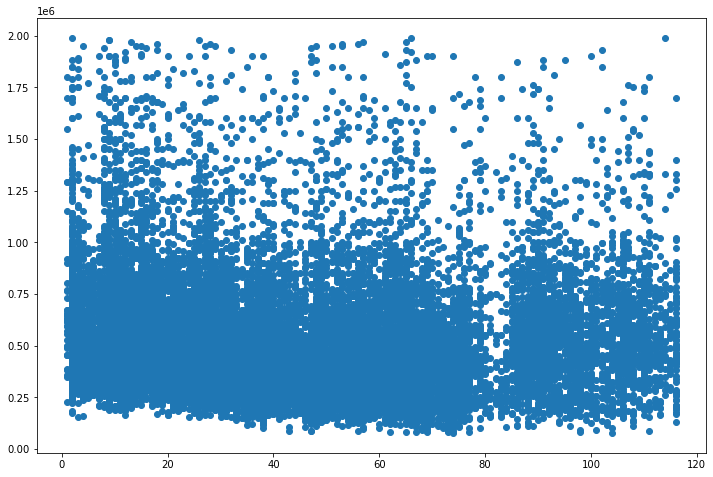

In [93]:
## plot age vs price
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(p_age_df['age'],p_age_df['price'])

based on the scatter plot and the low coefficient we can try to find a better way to use this age variable.
The coefficent suggests that as a house gets a year older about 1200 gets added to its value. 
The scatter plot is messy but looks fairly consistent.  Maybe grouping these into categorical variables will help

In [94]:
# copy the dataframe -
age_bins_df = df.copy()
age_bins_df.head()

id     price  sqft_living  sqft_lot   age  waterfront_YES  \
0  7129300520  221900.0         1180      5650  61.0               0   
1  6414100192  538000.0         2570      7242  65.0               0   
2  5631500400  180000.0          770     10000  83.0               0   
3  2487200875  604000.0         1960      5000  51.0               0   
4  1954400510  510000.0         1680      8080  29.0               0   

   view_EXCELLENT  view_FAIR  view_GOOD  view_NONE  condition_Good  \
0               0          0          0          1               0   
1               0          0          0          1               0   
2               0          0          0          1               0   
3               0          0          0          1               0   
4               0          0          0          1               0   

   condition_Poor  condition_Very Good  grade_11 Excellent  grade_12 Luxury  \
0               0                    0                   0                0   
1               0                    0                   0                0   
2               0                    0                   0                0   
3               0                    1                   0                0   
4               0                    0                   0                0   

   grade_13 Mansion  grade_4 Low  grade_5 Fair  grade_6 Low Average  \
0                 0            0             0                    0   
1                 0            0             0                    0   
2                 0            0             0                    1   
3                 0            0             0                    0   
4                 0            0             0                    0   

   grade_7 Average  grade_8 Good  grade_9 Better  district_Bellevue  \
0                1             0               0                  0   
1                1             0               0                  0   
2                0             0               0                  0   
3                1             0               0                  0   
4                0             1               0                  0   

   district_Enumclaw  district_Highline  district_Issaquah  district_Kent  \
0                  0                  0                  0              0   
1                  0                  0                  0              0   
2                  0                  0                  0              0   
3                  0                  0                  0              0   
4                  0                  0                  0              0   

   district_Lake Washington  district_Mercer Island  district_Northshore  \
0                         0                       0                    0   
1                         0                       0                    0   
2                         0                       0                    1   
3                         0                       0                    0   
4                         1                       0                    0   

   district_Renton  district_Riverview  district_Seattle  district_Shoreline  \
0                0                   0                 1                   0   
1                0                   0                 1                   0   
2                0                   0                 0                   0   
3                0                   0                 1                   0   
4                0                   0                 0                   0   

   district_Snoqualmie Valley  district_Tahoma  district_Tukwila  \
0                           0                0                 0   
1                           0                0                 0   
2                           0                0                 0   
3                           0                0                 0   
4                           0                0                 0   

   district_Vashon

In [95]:
#explore age range
age_bins_df['age'].min(),age_bins_df['age'].max()

(1.0, 116.0)

In [96]:
age_bins_df['age'].describe()

count    21389.000000
mean        45.014213
std         29.312241
min          1.000000
25%         19.000000
50%         41.000000
75%         65.000000
max        116.000000
Name: age, dtype: float64

the age ranges from 1-116 we can break this into groups better maybe use 10 yr blocks



In [97]:
def age_category(age):
    #dictionary values up to 40 years 
    age_dict = {0:'<_10', 1:'10-19',2:'20-29',3:'30-39',4:'40-49',5:'50-59',6:'60-69',7:'70-79',8:'80-89',
               9:'90-99',10:'100-109',11:'110-119'}
    return age_dict.get(age//10)
   
age_bins_df['age_cat'] = age_bins_df.apply(lambda x: age_category(x['age']),axis=1)


In [98]:
age_bins_df.head()

id     price  sqft_living  sqft_lot   age  waterfront_YES  \
0  7129300520  221900.0         1180      5650  61.0               0   
1  6414100192  538000.0         2570      7242  65.0               0   
2  5631500400  180000.0          770     10000  83.0               0   
3  2487200875  604000.0         1960      5000  51.0               0   
4  1954400510  510000.0         1680      8080  29.0               0   

   view_EXCELLENT  view_FAIR  view_GOOD  view_NONE  condition_Good  \
0               0          0          0          1               0   
1               0          0          0          1               0   
2               0          0          0          1               0   
3               0          0          0          1               0   
4               0          0          0          1               0   

   condition_Poor  condition_Very Good  grade_11 Excellent  grade_12 Luxury  \
0               0                    0                   0                0   
1               0                    0                   0                0   
2               0                    0                   0                0   
3               0                    1                   0                0   
4               0                    0                   0                0   

   grade_13 Mansion  grade_4 Low  grade_5 Fair  grade_6 Low Average  \
0                 0            0             0                    0   
1                 0            0             0                    0   
2                 0            0             0                    1   
3                 0            0             0                    0   
4                 0            0             0                    0   

   grade_7 Average  grade_8 Good  grade_9 Better  district_Bellevue  \
0                1             0               0                  0   
1                1             0               0                  0   
2                0             0               0                  0   
3                1             0               0                  0   
4                0             1               0                  0   

   district_Enumclaw  district_Highline  district_Issaquah  district_Kent  \
0                  0                  0                  0              0   
1                  0                  0                  0              0   
2                  0                  0                  0              0   
3                  0                  0                  0              0   
4                  0                  0                  0              0   

   district_Lake Washington  district_Mercer Island  district_Northshore  \
0                         0                       0                    0   
1                         0                       0                    0   
2                         0                       0                    1   
3                         0                       0                    0   
4                         1                       0                    0   

   district_Renton  district_Riverview  district_Seattle  district_Shoreline  \
0                0                   0                 1                   0   
1                0                   0                 1                   0   
2                0                   0                 0                   0   
3                0                   0                 1                   0   
4                0                   0                 0                   0   

   district_Snoqualmie Valley  district_Tahoma  district_Tukwila  \
0                           0                0                 0   
1                           0                0                 0   
2                           0                0                 0   
3                           0                0                 0   
4                           0                0                 0   

   district_Vashon

In [99]:
age_bins_df.groupby('age_cat')['price'].describe()

count           mean            std       min       25%       50%  \
age_cat                                                                       
10-19    3131.0  581464.426062  300223.263156  163800.0  365000.0  500000.0   
100-109   770.0  585006.653247  294035.889373   80000.0  390000.0  550000.0   
110-119   394.0  599140.992386  303349.128448   90000.0  410500.0  539000.0   
20-29    2384.0  544087.386745  292345.842128  154000.0  321725.0  478000.0   
30-39    2562.0  486351.414910  253123.500975  100000.0  305000.0  435000.0   
40-49    2135.0  464490.776581  264300.166257   89000.0  285000.0  400000.0   
50-59    2394.0  456458.017962  269353.746217   86500.0  271962.5  385750.0   
60-69    2375.0  467862.212632  271295.628195   82000.0  290000.0  400000.0   
70-79    1288.0  451147.068323  264078.222091   78000.0  267750.0  399970.0   
80-89     643.0  565199.194401  304397.721673  105500.0  344475.0  517000.0   
90-99    1090.0  549806.633028  268668.474826   83000.0  372625.0  512015.5   
<_10     2223.0  589039.971660  308689.489910  155000.0  375000.0  500000.0   

              75%        max  
age_cat                       
10-19    710000.0  1970000.0  
100-109  713375.0  1930000.0  
110-119  747625.0  1990000.0  
20-29    678875.0  1980000.0  
30-39    592000.0  1930000.0  
40-49    555000.0  1950000.0  
50-59    550847.0  1970000.0  
60-69    567500.0  1990000.0  
70-79    554679.5  1900000.0  
80-89    698500.0  1870000.0  
90-99    667312.5  1880000.0  
<_10     716250.0  1990000.0

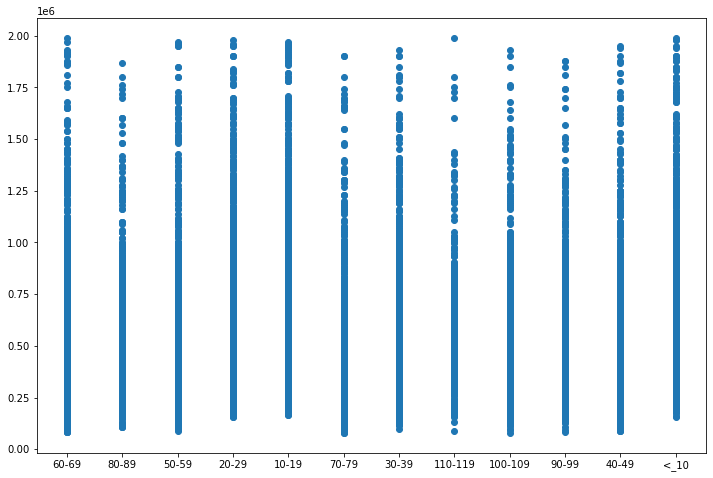

In [100]:
fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(age_bins_df['age_cat'],age_bins_df['price'])
plt.show()

Leaving the age alone as of now.  It appears that there are some older houses that are very expensive.  This could say something about the quality of new homes being built and where the new homes are being built.

### Model 6

Now lets see if using log transformations on some of our continous predictors helps our model out.

we will need to see look at scatter plots of our suspected predictors

In [101]:
df.head()

id     price  sqft_living  sqft_lot   age  waterfront_YES  \
0  7129300520  221900.0         1180      5650  61.0               0   
1  6414100192  538000.0         2570      7242  65.0               0   
2  5631500400  180000.0          770     10000  83.0               0   
3  2487200875  604000.0         1960      5000  51.0               0   
4  1954400510  510000.0         1680      8080  29.0               0   

   view_EXCELLENT  view_FAIR  view_GOOD  view_NONE  condition_Good  \
0               0          0          0          1               0   
1               0          0          0          1               0   
2               0          0          0          1               0   
3               0          0          0          1               0   
4               0          0          0          1               0   

   condition_Poor  condition_Very Good  grade_11 Excellent  grade_12 Luxury  \
0               0                    0                   0                0   
1               0                    0                   0                0   
2               0                    0                   0                0   
3               0                    1                   0                0   
4               0                    0                   0                0   

   grade_13 Mansion  grade_4 Low  grade_5 Fair  grade_6 Low Average  \
0                 0            0             0                    0   
1                 0            0             0                    0   
2                 0            0             0                    1   
3                 0            0             0                    0   
4                 0            0             0                    0   

   grade_7 Average  grade_8 Good  grade_9 Better  district_Bellevue  \
0                1             0               0                  0   
1                1             0               0                  0   
2                0             0               0                  0   
3                1             0               0                  0   
4                0             1               0                  0   

   district_Enumclaw  district_Highline  district_Issaquah  district_Kent  \
0                  0                  0                  0              0   
1                  0                  0                  0              0   
2                  0                  0                  0              0   
3                  0                  0                  0              0   
4                  0                  0                  0              0   

   district_Lake Washington  district_Mercer Island  district_Northshore  \
0                         0                       0                    0   
1                         0                       0                    0   
2                         0                       0                    1   
3                         0                       0                    0   
4                         1                       0                    0   

   district_Renton  district_Riverview  district_Seattle  district_Shoreline  \
0                0                   0                 1                   0   
1                0                   0                 1                   0   
2                0                   0                 0                   0   
3                0                   0                 1                   0   
4                0                   0                 0                   0   

   district_Snoqualmie Valley  district_Tahoma  district_Tukwila  \
0                           0                0                 0   
1                           0                0                 0   
2                           0                0                 0   
3                           0                0                 0   
4                           0                0                 0   

   district_Vashon

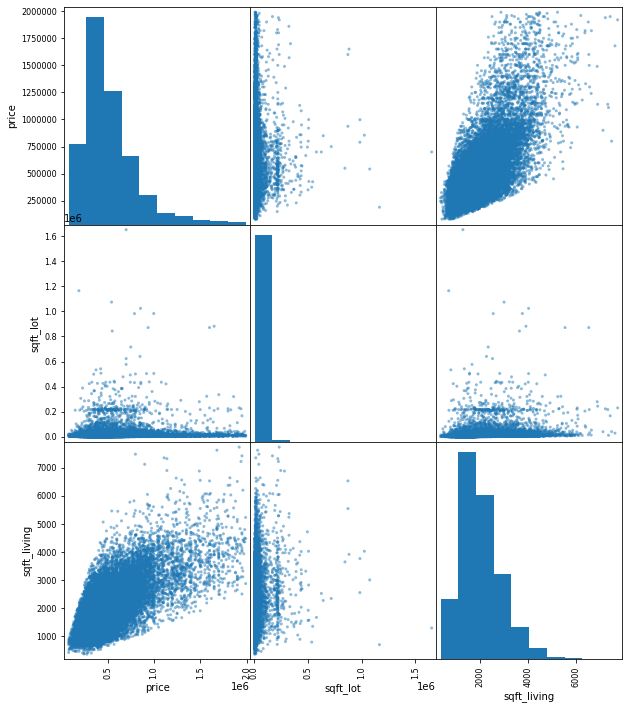

In [102]:
#lets look at 
x_nums=['price','sqft_lot','sqft_living']
pd.plotting.scatter_matrix(df[x_nums], figsize=(10,12));

lets start with log Transforming all of the numeric predictors


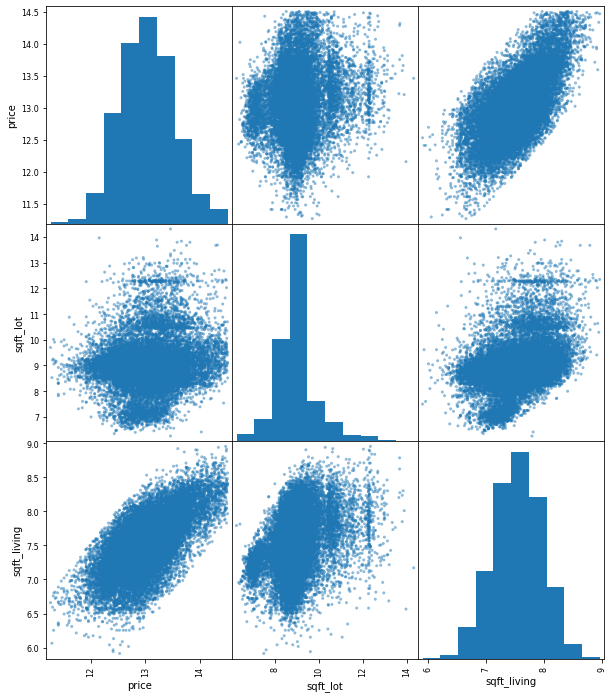

In [103]:
df_logged = df.copy()
for col in x_nums:
    df_logged[col] = df_logged[col].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(df_logged[x_nums], figsize=(10,12));

rerun the OLS

In [104]:
#recreate our X,y for the next model
X = df_logged.drop(['price','id'],axis=1) #dataframe without price, id
y = df_logged['price'] # dataframe only price

In [105]:
#list of predictor columns
X_int = sm.add_constant(X)  #add a constant
model = sm.OLS(y,X_int).fit()  # fit the model
model.summary()  # displat summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     2169.
Date:                Tue, 19 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:46:41   Log-Likelihood:                 1401.3
No. Observations:               21389   AIC:                            -2725.
Df Residuals:                   21350   BIC:                            -2414.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          9.2926      0.050    186.870      0.000       9.195       9.390
sqft_living                    0.4599      0.006     77.880      0.000       0.448       0.471
sqft_lot                       0.0213      0.002      9.101      0.000       0.017       0.026
age                            0.0017    8.1e-05     20.427      0.000       0.001       0.002
waterfront_YES                 0.3818      0.027     14.152      0.000       0.329       0.435
view_EXCELLENT                 0.1423      0.018      7.722      0.000       0.106       0.178
view_FAIR                      0.0158      0.015      1.071      0.284      -0.013       0.045
view_GOOD                      0.0435      0.013      3.394      0.001       0.018       0.069
view_NONE                     -0.1057      0.008    -13.530      0.000      -0.121      -0.090
condition_Good                 0.0339      0.004      8.664      0.000       0.026       0.042
condition_Poor                -0.1728      0.043     -4.062      0.000      -0.256      -0.089
condition_Very Good            0.0936      0.006     15.004      0.000       0.081       0.106
grade_11 Excellent             0.1103      0.014      7.637      0.000       0.082       0.139
grade_12 Luxury                0.2114      0.032      6.701      0.000       0.150       0.273
grade_13 Mansion               0.7845      0.227      3.456      0.001       0.340       1.230
grade_4 Low                   -0.6978      0.046    -15.331      0.000      -0.787      -0.609
grade_5 Fair                  -0.6934      0.019    -37.442      0.000      -0.730      -0.657
grade_6 Low Average           -0.6352      0.011    -56.283      0.000      -0.657      -0.613
grade_7 Average               -0.4758      0.009    -53.483      0.000      -0.493      -0.458
grade_8 Good                  -0.3123      0.008    -38.207      0.000      -0.328      -0.296
grade_9 Better                -0.1269      0.008    -15.162      0.000      -0.143      -0.110
district_Bellevue              0.7349      0.009     85.835      0.000       0.718       0.752
district_Enumclaw              0.1316      0.014      9.132      0.000       0.103       0.160
district_Highline              0.1755      0.009     19.785      0.000       0.158       0.193
district_Issaquah              0.5143      0.008     62.758      0.000       0.498       0.530
district_Kent                  0.0886      0.008     10.945      0.000       0.073       0.104
district_Lake Washington       0.6017      0.007     83.111      0.000       0.588       0.616
district_Mercer Island         0.8269      0.015     53.902      0.000       0.797       0.857
district_Northshore            0.4516      0.009     48.254      0.000       0.433       0.470
district_Renton                0.2919      

Model 6 - Adjusted R-squarred improved to .794  

##  Model 7

drop bad pvalues -  'view_FAIR'

In [106]:
df_logged = df_logged.drop(['view_FAIR'],axis=1)
df_logged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21389 entries, 0 to 21596
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          21389 non-null  int64  
 1   price                       21389 non-null  float64
 2   sqft_living                 21389 non-null  float64
 3   sqft_lot                    21389 non-null  float64
 4   age                         21389 non-null  float64
 5   waterfront_YES              21389 non-null  uint8  
 6   view_EXCELLENT              21389 non-null  uint8  
 7   view_GOOD                   21389 non-null  uint8  
 8   view_NONE                   21389 non-null  uint8  
 9   condition_Good              21389 non-null  uint8  
 10  condition_Poor              21389 non-null  uint8  
 11  condition_Very Good         21389 non-null  uint8  
 12  grade_11 Excellent          21389 non-null  uint8  
 13  grade_12 Luxury             213

In [107]:
#recreate our X,y for the next model
X = df_logged.drop(['price','id'],axis=1) #dataframe without price, id
y = df_logged['price'] # dataframe only price

In [108]:
#list of predictor columns
X_int = sm.add_constant(X)  #add a constant
model = sm.OLS(y,X_int).fit()  # fit the model
model.summary()  # displat summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     2227.
Date:                Tue, 19 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:46:41   Log-Likelihood:                 1400.7
No. Observations:               21389   AIC:                            -2725.
Df Residuals:                   21351   BIC:                            -2422.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          9.2961      0.050    187.333      0.000       9.199       9.393
sqft_living                    0.4600      0.006     77.893      0.000       0.448       0.472
sqft_lot                       0.0213      0.002      9.098      0.000       0.017       0.026
age                            0.0017    8.1e-05     20.420      0.000       0.001       0.002
waterfront_YES                 0.3816      0.027     14.143      0.000       0.329       0.434
view_EXCELLENT                 0.1383      0.018      7.662      0.000       0.103       0.174
view_GOOD                      0.0394      0.012      3.222      0.001       0.015       0.063
view_NONE                     -0.1097      0.007    -16.043      0.000      -0.123      -0.096
condition_Good                 0.0340      0.004      8.671      0.000       0.026       0.042
condition_Poor                -0.1724      0.043     -4.053      0.000      -0.256      -0.089
condition_Very Good            0.0936      0.006     15.001      0.000       0.081       0.106
grade_11 Excellent             0.1103      0.014      7.636      0.000       0.082       0.139
grade_12 Luxury                0.2107      0.032      6.681      0.000       0.149       0.273
grade_13 Mansion               0.7847      0.227      3.457      0.001       0.340       1.230
grade_4 Low                   -0.6967      0.046    -15.312      0.000      -0.786      -0.608
grade_5 Fair                  -0.6931      0.019    -37.431      0.000      -0.729      -0.657
grade_6 Low Average           -0.6350      0.011    -56.273      0.000      -0.657      -0.613
grade_7 Average               -0.4756      0.009    -53.472      0.000      -0.493      -0.458
grade_8 Good                  -0.3122      0.008    -38.194      0.000      -0.328      -0.296
grade_9 Better                -0.1268      0.008    -15.149      0.000      -0.143      -0.110
district_Bellevue              0.7350      0.009     85.853      0.000       0.718       0.752
district_Enumclaw              0.1312      0.014      9.107      0.000       0.103       0.159
district_Highline              0.1756      0.009     19.805      0.000       0.158       0.193
district_Issaquah              0.5143      0.008     62.761      0.000       0.498       0.530
district_Kent                  0.0885      0.008     10.943      0.000       0.073       0.104
district_Lake Washington       0.6018      0.007     83.127      0.000       0.588       0.616
district_Mercer Island         0.8275      0.015     53.972      0.000       0.797       0.858
district_Northshore            0.4516      0.009     48.262      0.000       0.433       0.470
district_Renton                0.2919      0.008     37.191      0.000       0.277       0.307
district_Riverview             0.3991      

model 7 adjusted r-squarred is .795

79.5% of the variance in price are explained by the predictors of our model

## Coefficients
lets look at the coefficients
const - 9.3183

In [109]:
coef_df = pd.DataFrame(model.params)
coef_df = coef_df.drop('const')

In [110]:
##sort data by absolute value
#Top 5 predictors that lower the price
coef_df.sort_values(0).head(10)

0
grade_4 Low         -0.696740
grade_5 Fair        -0.693143
grade_6 Low Average -0.635020
grade_7 Average     -0.475586
grade_8 Good        -0.312182
condition_Poor      -0.172392
grade_9 Better      -0.126761
view_NONE           -0.109715
age                  0.001655
bathrooms_3.0        0.010404

## Predictors That Negatively Affect Price
It appears that having a grade between 4-8 are the greatest factors in lowering the price of a house

In [111]:
##sort data by absolute value
#Top 5 predictors that lower the price
coef_df.sort_values(0).tail(10)

0
district_Snoqualmie Valley  0.404768
district_Shoreline          0.441394
district_Northshore         0.451629
sqft_living                 0.459957
district_Issaquah           0.514347
district_Lake Washington    0.601789
district_Seattle            0.646610
district_Bellevue           0.735009
grade_13 Mansion            0.784739
district_Mercer Island      0.827505

## Predictors That Positively Affect Price
Being a part of Mercer Island, Bellevue, Seattle and Lake Washington as well as being a grade_13 Mansion are the biggest predictors of price. 

Other school districts as well as sqft_living round out the top 10.

## Predictors Value Based On Coeff


In [112]:
coef_df['abs_coef'] = coef_df.apply(lambda x: abs(x[0]), axis=1)
coef_df.sort_values('abs_coef', ascending = False)

0  abs_coef
district_Mercer Island      0.827505  0.827505
grade_13 Mansion            0.784739  0.784739
district_Bellevue           0.735009  0.735009
grade_4 Low                -0.696740  0.696740
grade_5 Fair               -0.693143  0.693143
district_Seattle            0.646610  0.646610
grade_6 Low Average        -0.635020  0.635020
district_Lake Washington    0.601789  0.601789
district_Issaquah           0.514347  0.514347
grade_7 Average            -0.475586  0.475586
sqft_living                 0.459957  0.459957
district_Northshore         0.451629  0.451629
district_Shoreline          0.441394  0.441394
district_Snoqualmie Valley  0.404768  0.404768
district_Riverview          0.399136  0.399136
waterfront_YES              0.381579  0.381579
district_Vashon Island      0.363031  0.363031
grade_8 Good               -0.312182  0.312182
district_Renton             0.291891  0.291891
grade_12 Luxury             0.210742  0.210742
district_Tahoma             0.202667  0.202667
district_Highline           0.175625  0.175625
condition_Poor             -0.172392  0.172392
view_EXCELLENT              0.138307  0.138307
district_Enumclaw           0.131156  0.131156
grade_9 Better             -0.126761  0.126761
grade_11 Excellent          0.110300  0.110300
view_NONE                  -0.109715  0.109715
district_Tukwila            0.099166  0.099166
condition_Very Good         0.093587  0.093587
district_Kent               0.088547  0.088547
view_GOOD                   0.039447  0.039447
condition_Good              0.033971  0.033971
floors_2.5                  0.032202  0.032202
bedrooms_2.5                0.032202  0.032202
sqft_lot                    0.021253  0.021253
bedrooms_3.0                0.010404  0.010404
floors_3.0                  0.010404  0.010404
bathrooms_3.0               0.010404  0.010404
age                         0.001655  0.001655

## Look at School Districts Dropped
Just because they were dropped to improve the model does not necessarily eliminate them from our clients questions.  Remember we want to provide them with school districts to focus on for improvement by means of funding.  

I am also curios to see the breakdown of the zipcodes that they fall into.

In [113]:
#revisiting dropped school districts that were dropped 
dropped_zips = freq_df[['Zipcode','Federal Way','Fife']]
dropped_zips.head()

Zipcode  Federal Way      Fife
0    98001     0.680327  0.088452
1    98002     0.000000  0.000000
2    98003     0.987850  0.012150
3    98004     0.000000  0.000000
4    98005     0.000000  0.000000

In [114]:
## drop any zipcode if either column is 0
dropped_zips = dropped_zips[(dropped_zips['Federal Way']!=0) | (dropped_zips['Fife']!=0)]
dropped_zips
        
        

Zipcode  Federal Way      Fife
0     98001     0.680327  0.088452
2     98003     0.987850  0.012150
13    98023     1.000000  0.000000
20    98032     0.302055  0.000000
68    98198     0.159264  0.000000

Fife School district was most likely eliminated because the majority of houses fall outside of King County.  For this same reason our clients should not focus on that district.  

Federal way may be a district for our clients to consider.  It makes up all or close to all of zipcodes 98023, 98003. As well as the majority of 98001 and a good portion of 98032, 98198.

## Looking at Grade_13 Mansion Houses

In [115]:
#how many Grade_13 Mansions
df[df['grade_13 Mansion']==1]

id      price  sqft_living  sqft_lot   age  waterfront_YES  \
5446  7237501190  1780000.0         4890     13402  12.0               0   

      view_EXCELLENT  view_FAIR  view_GOOD  view_NONE  condition_Good  \
5446               0          0          0          1               0   

      condition_Poor  condition_Very Good  grade_11 Excellent  \
5446               0                    0                   0   

      grade_12 Luxury  grade_13 Mansion  grade_4 Low  grade_5 Fair  \
5446                0                 1            0             0   

      grade_6 Low Average  grade_7 Average  grade_8 Good  grade_9 Better  \
5446                    0                0             0               0   

      district_Bellevue  district_Enumclaw  district_Highline  \
5446                  0                  0                  0   

      district_Issaquah  district_Kent  district_Lake Washington  \
5446                  0              0                         0   

      district_Mercer Island  district_Northshore  district_Renton  \
5446                       0                    0                1   

      district_Riverview  district_Seattle  district_Shoreline  \
5446                   0                 0                   0   

      district_Snoqualmie Valley  district_Tahoma  district_Tukwila  \
5446                           0                0                 0   

      district_Vashon Island  floors_2.5  floors_3.0  bedrooms_2.5  \
5446                       0           0           0             0   

      bedrooms_3.0  bathrooms_3.0  
5446             0              0

# Interpret
_____

## Final Model
Our Final Model had an Adjusted R-Squarred of 79.5, which meets our goal of 75%. This means that 79.5% of the variance in price is explained by our model. We feel that time spent improving the model would not lead to much more insight.  All predictor p values meet our .005 alpha requirement.  This is a sign that they are good predictors of the price of a home.  There are many strong coefficients from our predictors which will allow us to confidently answer our clients questions below.


## Client Questions

1. What are the leading predictors of a houses sale price?

2. What effect does school district have on the sale price of a house?

3. Which school districts would be good places for EdConsult to target?


### Leading Predictors of a Houses Sale Price

Our model suggests as one might expect that the location and the size of the home are the best positive predictors of price.  It also suggest that the grade of the house plays a great factor in determining the price.

From King County Assesors: 

>"Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. (See Glossary in Area Report for Residential Building Grades in use by the King County Department of Assessments.)"""<

https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g

A grade of 13_Mansion is one of our top positive predictors.  But there is only one house included.

grades 4-7 are amoung our top negative price predictors.  These all roughly deal with the quality of the build.

**School District, Size of the Home and Quality of Build are the biggest predictors of housing prices in King County Wa.**


### How School District Affects Sale Price

To show the effect on the School District Price we will use Coefficients from our OLS Model



1. Mercer Island:	 0.8295
2. Bellevue	0.735009
3. Seattle:	0.6466	
4. Lake Washington:	0.6031	
5. Issaquah:	0.5215	
6. Northshore:	0.4527		
7. Shoreline:	0.4442	
8. Snoqualmie Valley:	0.4052	
9. Riverview:	0.3948	
10. Vashon Island:	0.3626
11. Renton:	0.2861	
12. Tahoma:	0.2024	
13. Highline:	0.1706	
14. Enumclaw: 0.1166
15. Tukwila:	0.1017	
16. Kent:	 0.0924	

* need to save the data after the districts are added so data doesn't change each run.  But these values will remaian relatively constant.

#### Average Home Price for Each District




In [148]:
## get the average sale price of homes for each district
kc_df_no_outliers.groupby('district')['price'].mean().nlargest(20)

district
Mercer Island        1.066568e+06
Bellevue             8.317548e+05
Issaquah             6.406003e+05
Lake Washington      6.379400e+05
Seattle              5.672396e+05
Northshore           5.411156e+05
Snoqualmie Valley    5.023386e+05
Vashon Island        4.893820e+05
Riverview            4.840617e+05
Shoreline            4.430410e+05
Renton               4.210790e+05
Tahoma               3.666037e+05
Enumclaw             3.412966e+05
Highline             3.367316e+05
Kent                 3.110395e+05
Fife                 3.041791e+05
Auburn               2.962630e+05
Federal Way          2.868605e+05
Tukwila              2.775758e+05
Name: price, dtype: float64

<AxesSubplot:title={'center':'Average Home Price By District'}, xlabel='district', ylabel='price in millions'>

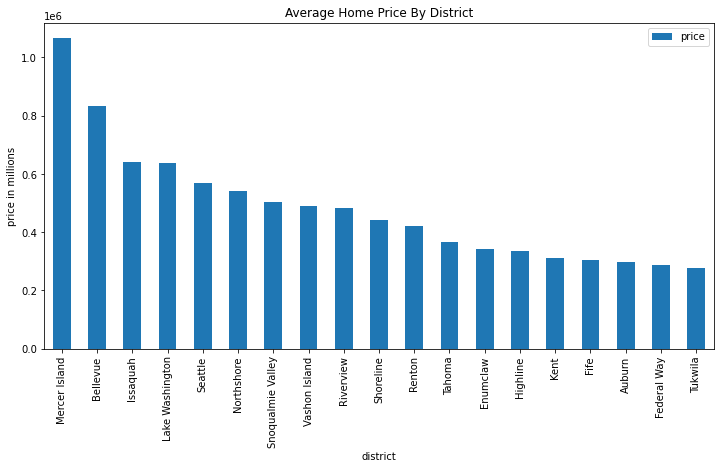

In [171]:
#create bar chart for slides
bar_df = pd.DataFrame(kc_df_no_outliers.groupby('district')['price'].mean().nlargest(20))
bar_df.plot(kind='bar', title="Average Home Price By District", ylabel='price in millions',figsize=(12,6))
#plt.show()

### Which School Districts To Target
EdConsult should target districts with coefficients in the middle of our model.  These are the areas of King County where they can have the most impact in the upcomming election.

The Top Districts will probably be least affected by their campaign efforts to improve schools by improving the value of their homes.  

The Bottom Districts will most likely be a tough sell but would be better selection than top.  

The Middle Districts show the most promise because their coefficient already suggest that living in the district adds a good amount of value to the home.  

Remember we already eliminated Fife School District based on being mostly out of King County.  And Federal would fall just after Kent.

It is our reccomendation that EdConsult focuses on 
**Snoqualmie Valley, Vashon Island,Riverview,Shoreline, Renton, Tahoma, Enumclaw, Highline** during this next election cycle.  Or at least use this group to start narrowing down based on further study. For the good of the county as a whole winning elections in these districts is key.  In following elections the middle group will ideally change as school districts improve. 
